

# **BAT SPECIES CLASSIFICATION USING DEEP NEURAL NETWORK**

---

> Author: *Japneet Singh*


> Supervised by: *Dr. Rafael DeAndrade Moral*


---








---


*NOTE: Please upload the file "Species-Data.xlsx" before running any of the code chunk.*


---



## **Libraries and Modules**

In [3]:
## LIBRARIES AND MODULES REQUIRED

import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import np_utils
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout
from keras.models import Sequential
import keras
import tensorflow as tf
import matplotlib as mlp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Understanding the Data**

In [4]:
## Reading in the data
data = pd.read_excel("Species-Data.xlsx")
d = data.iloc[0:5,]
d

,Folds,File,Owner,Family,Genus,Species,Guild,Country,Quality,CallDuration,Fc,HiFreq,LowFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,TimeFromMaxToFc,FreqKnee,PrcntKneeDur,StartF,EndF,DominantSlope,SlopeAtFc,StartSlope,EndSlope,SteepestSlope,LowestSlope,TotalSlope,HiFtoKnSlope,KneeToFcSlope,CummNmlzdSlp,HiFtoFcExpAmp,HiFtoFcDmp,KnToFcExpAmp,KnToFcDmp,HiFtoKnExpAmp,HiFtoKnDmp,FreqLedge,LedgeDuration,FreqCtr,...,FFwd32dB,FBak20dB,FFwd20dB,FBak15dB,FFwd15dB,FBak5dB,FFwd5dB,Bndw32dB,Bndw20dB,Bndw15dB,Bndw5dB,DurOf32dB,DurOf20dB,DurOf15dB,DurOf5dB,Amp1stQrtl,Amp2ndQrtl,Amp3rdQrtl,Amp4thQrtl,Amp1stMean,Amp2ndMean,Amp3rdMean,Amp4thMean,LnExpA_StartAmp,LnExpB_StartAmp,AmpStartLn60ExpC,LnExpA_EndAmp,LnExpB_EndAmp,AmpEndLn60ExpC,AmpK.start,AmpK.end,AmpKurtosis,AmpSkew,AmpVariance,AmpMoment,AmpGausR2,HiFminusStartF,FcMinusEndF,RelPwr2ndTo1st,RelPwr3rdTo1st
0,4,Anogeo-456-Maple_M00012,VZG,Phyllostomidae,Anoura,Anogeo,6,Mexico,0.434226,2.503670,69.618386,109.488419,67.464018,42.024402,77.528764,63.773857,0.756463,81.747286,50.579266,109.488419,67.464018,10.051654,12.657634,-29.635308,-14.389360,28.643700,9.955334,16.501900,21.583508,10.655935,16.186056,5.945569,0.833110,2.282744,1.615371,4.748148,1.455786,79.908708,0.958343,82.037907,...,-0.424038,100.921154,72.510577,97.104808,73.782692,88.624038,75.902885,166.223077,28.410577,23.322115,12.721154,4.675687,1.796097,1.480865,0.825873,85.685948,10373.976390,16314.20271,11582.064750,0.759041,0.877400,0.982363,0.853602,4.587637,-0.000073,5.057623,3.476897,-0.000123,4.514417,13.196032,6.150363,2.451373,-0.529526,0.010571,0.010490,0.831160,0.0,2.154368,0.298995,0.241145
1,4,Anogeo-456-Maple_M00012,VZG,Phyllostomidae,Anoura,Anogeo,6,Mexico,0.519223,2.547593,68.805459,109.014483,64.619712,44.394771,78.362913,54.821910,0.893621,80.822997,47.608501,109.014483,64.619712,9.745301,13.402673,-37.794947,-17.148255,35.514765,9.511894,16.472087,22.240596,10.581605,15.338695,4.686295,0.955763,2.422442,1.557995,4.312329,1.594380,78.592746,0.911997,80.040932,...,7.242701,98.581204,71.219891,88.119526,72.024635,83.693431,74.438869,141.232664,27.361314,16.094891,9.254562,5.021583,1.757282,1.187584,0.698319,73.202037,6456.715199,13205.46264,6925.502548,0.715992,0.818016,0.982052,0.813088,4.529092,-0.000060,5.021358,-0.258435,-0.009012,4.090438,11.723782,5.633335,2.100453,-0.385202,0.015818,0.015703,0.786119,0.0,4.185747,0.243366,0.231044
2,4,Anogeo-456-Maple_M00012,VZG,Phyllostomidae,Anoura,Anogeo,6,Mexico,0.631567,2.312634,70.297715,109.447511,64.646231,44.801280,79.384892,55.521668,0.734879,83.699015,43.624168,109.447511,64.646231,11.414478,15.542078,-33.103609,-20.606456,33.004030,11.229019,18.477740,25.447501,12.554325,16.884238,4.907871,1.057170,2.665548,1.671940,3.898636,1.972126,80.154055,0.789908,81.246596,...,68.017137,96.913306,72.462702,93.801411,73.351815,87.577621,76.019153,92.467742,24.450605,20.449597,11.558468,0.165230,1.468458,1.266621,0.697036,58.181761,12500.221450,16616.03779,8613.076357,0.650410,0.907825,0.978463,0.781930,4.864376,-0.000059,5.239188,4.581397,-0.000077,5.053577,11.626697,7.589906,2.002653,-0.589580,0.021116,0.020946,0.987820,0.0,5.651484,0.166177,0.169072
3,4,Anogeo-456-Maple_M00012,VZG,Phyllostomidae,Anoura,Anogeo,6,Mexico,0.367486,2.233911,71.891085,113.408873,69.805319,43.603553,85.760274,45.434128,1.069576,84.027946,49.564504,113.408873,69.805319,10.666824,13.028367,-41.348016,-14.102591,40.448870,10.548972,18.685895,25.665773,11.771968,17.580283,4.520666,1.083218,1.987666,1.936622,4.049175,1.858173,80.489838,0.755862,83.689940,...,-0.463235,107.933824,69.485294,99.132353,72.264706,94.036765,79.213235,171.397059,38.448529,26.867647,14.823529,4.837353,2.732619,1.659660,0.793513,68.813128,15489.911830,15133.54974,8287.131349,0.777803,0.985458,0.960104,0.827578,4.484426,-0.000049,4.994389,2.179559,-0.000740,4.216423,8.003581,10.733286,1.874619,-0.580224,0.010325,0.010238,0.849326,0.0,2.085766,0.365763,0.128119
4,4,Anogeo-456-Maple_M00012,VZG,Phyllostomidae,Anoura,Anogeo,6,Mexico,0.5

In [4]:
# Statistical summary of the acoustic part of the data
data.describe()

,Folds,Guild,Quality,CallDuration,Fc,HiFreq,LowFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,TimeFromMaxToFc,FreqKnee,PrcntKneeDur,StartF,EndF,DominantSlope,SlopeAtFc,StartSlope,EndSlope,SteepestSlope,LowestSlope,TotalSlope,HiFtoKnSlope,KneeToFcSlope,CummNmlzdSlp,HiFtoFcExpAmp,HiFtoFcDmp,KnToFcExpAmp,KnToFcDmp,HiFtoKnExpAmp,HiFtoKnDmp,FreqLedge,LedgeDuration,FreqCtr,FBak32dB,FFwd32dB,FBak20dB,FFwd20dB,FBak15dB,FFwd15dB,FBak5dB,FFwd5dB,Bndw32dB,Bndw20dB,Bndw15dB,Bndw5dB,DurOf32dB,DurOf20dB,DurOf15dB,DurOf5dB,Amp1stQrtl,Amp2ndQrtl,Amp3rdQrtl,Amp4thQrtl,Amp1stMean,Amp2ndMean,Amp3rdMean,Amp4thMean,LnExpA_StartAmp,LnExpB_StartAmp,AmpStartLn60ExpC,LnExpA_EndAmp,LnExpB_EndAmp,AmpEndLn60ExpC,AmpK.start,AmpK.end,AmpKurtosis,AmpSkew,AmpVariance,AmpMoment,AmpGausR2,HiFminusStartF,FcMinusEndF,RelPwr2ndTo1st,RelPwr3rdTo1st
count,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4666.000000,4666.000000,4666.000000,4685.000000,4685.000000,4668.000000,4668.000000,4668.000000,4685.000000,4619.000000,4619.000000,4664.000000,4664.000000,4552.000000,4552.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4674.000000,4683.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000
mean,3.036073,2.903735,0.813783,5.657883,43.689671,66.764831,40.156248,26.608583,48.896446,51.578932,1.766853,52.085578,36.317818,66.426459,40.272878,6.006455,5.306892,-13.727706,-7.616825,15.327082,3.872533,7.627746,11.527837,5.554011,7.266529,3.212912,0.721053,1.751607,1.745607,2.705652,1.665694,48.830866,1.402521,49.927987,71.779069,37.091168,60.204510,43.655431,57.736089,44.846008,53.450889,47.223985,34.687901,16.549079,12.890081,6.226904,4.612823,3.692389,3.322801,2.227865,89.755795,14711.417250,17123.747683,12764.440508,0.745134,0.900213,0.932368,0.811242,4.218406,-0.004061,5.073708,3.943548,-0.008442,5.065892,12.884311,11.340433,4.480567,-1.150731,0.019363,0.019255,0.743421,0.338372,3.416793,0.242449,0.091010
std,1.416996,1.663748,0.138290,4.713707,17.550274,23.736796,15.947061,16.116921,18.863519,20.685584,1.720304,19.985205,72.348810,23.920340,15.950875,8.816793,6.993045,12.995602,7.907995,12.519711,6.109966,8.063888,10.844691,6.810428,7.957890,4.216936,0.768804,2.655948,4.681560,2.921882,1.941583,19.588847,1.542148,19.156029,38.014553,15.984819,25.714266,17.577185,22.586070,18.391611,20.973832,19.426533,39.262630,17.539160,10.852415,5.087465,6.146553,4.728013,4.133826,3.045918,34.061510,6606.948868,6145.937232,5663.788783,0.129446,0.096709,0.067860,0.083827,1.647925,0.041237,0.465253,2.079767,0.195146,0.571430,12.879439,10.923802,3.658799,0.867159,0.010213,0.010157,0.192867,1.013310,3.941899,0.197208,0.120156
min,1.000000,1.000000,0.301396,0.643156,10.327724,15.312047,9.709136,0.280563,13.472273,2.399693,-5.506052,0.000000,-3047.100549,15.209326,9.709136,0.000000,0.000010,-103.206333,-55.639019,0.000000,0.000000,0.000180,0.000011,0.000096,0.057537,-3.553000,-0.491622,-0.849430,-22.911161,-3.492599,-1.021187,0.000000,-5.647760,14.578312,4.300532,-5.011364,3.127660,-2.041667,3.127660,-2.041667,2.736702,1.563830,0.928893,0.480462,0.390744,0.156230,0.000000,0.000000,0.000000,0.000000,21.031607,583.202422,899.419792,855.878522,0.143682,0.334479,0.459613,0.410447,-7.504199,-1.736800,4.078631,-8.549297,-13.210987,4.078530,-0.982891,-3.165211,1.102181,-5.775898,0.002485,0.002478,-0.696527,0.000000,-3.376317,0.000000,0.000000
25%,2.000000,2.000000,0.747095,3.154686,31.740544,48.731613,29.335178,14.962046,36.432847,35.314506,0.677730,39.79

We observe that the numerical variables have a varied scale and hence the scaling of the data is necessary.

In [5]:
# Data type of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Folds             4685 non-null   int64  
 1   File              4685 non-null   object 
 2   Owner             4685 non-null   object 
 3   Family            4685 non-null   object 
 4   Genus             4685 non-null   object 
 5   Species           4685 non-null   object 
 6   Guild             4685 non-null   int64  
 7   Country           4685 non-null   object 
 8   Quality           4685 non-null   float64
 9   CallDuration      4685 non-null   float64
 10  Fc                4685 non-null   float64
 11  HiFreq            4685 non-null   float64
 12  LowFreq           4685 non-null   float64
 13  Bndwdth           4685 non-null   float64
 14  FreqMaxPwr        4685 non-null   float64
 15  PrcntMaxAmpDur    4685 non-null   float64
 16  TimeFromMaxToFc   4685 non-null   float64


In [6]:
## Categorical encoding of the categorical features

data["Species"] = data["Species"].astype('category') 
data["Species_cat"] = data["Species"].cat.codes

data["Family"] = data["Family"].astype('category') 
data["Family_cat"] = data["Family"].cat.codes

data["Genus"] = data["Genus"].astype('category') 
data["Genus_cat"] = data["Genus"].cat.codes

data["Guild"] = data["Guild"].astype('category') 
data["Guild_cat"] = data["Guild"].cat.codes


data["File"] = data["File"].astype('category') 
data["File_cat"] = data["File"].cat.codes


data["Country"] = data["Country"].astype('category') 
data["Country_cat"] = data["Country"].cat.codes

## Dropping out the feature Folds as it is irrelevant for this study.
data = data.drop(['Folds'], axis = 1)

data.head()


,File,Owner,Family,Genus,Species,Guild,Country,Quality,CallDuration,Fc,HiFreq,LowFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,TimeFromMaxToFc,FreqKnee,PrcntKneeDur,StartF,EndF,DominantSlope,SlopeAtFc,StartSlope,EndSlope,SteepestSlope,LowestSlope,TotalSlope,HiFtoKnSlope,KneeToFcSlope,CummNmlzdSlp,HiFtoFcExpAmp,HiFtoFcDmp,KnToFcExpAmp,KnToFcDmp,HiFtoKnExpAmp,HiFtoKnDmp,FreqLedge,LedgeDuration,FreqCtr,FBak32dB,...,FFwd5dB,Bndw32dB,Bndw20dB,Bndw15dB,Bndw5dB,DurOf32dB,DurOf20dB,DurOf15dB,DurOf5dB,Amp1stQrtl,Amp2ndQrtl,Amp3rdQrtl,Amp4thQrtl,Amp1stMean,Amp2ndMean,Amp3rdMean,Amp4thMean,LnExpA_StartAmp,LnExpB_StartAmp,AmpStartLn60ExpC,LnExpA_EndAmp,LnExpB_EndAmp,AmpEndLn60ExpC,AmpK.start,AmpK.end,AmpKurtosis,AmpSkew,AmpVariance,AmpMoment,AmpGausR2,HiFminusStartF,FcMinusEndF,RelPwr2ndTo1st,RelPwr3rdTo1st,Species_cat,Family_cat,Genus_cat,Guild_cat,File_cat,Country_cat
0,Anogeo-456-Maple_M00012,VZG,Phyllostomidae,Anoura,Anogeo,6,Mexico,0.434226,2.503670,69.618386,109.488419,67.464018,42.024402,77.528764,63.773857,0.756463,81.747286,50.579266,109.488419,67.464018,10.051654,12.657634,-29.635308,-14.389360,28.643700,9.955334,16.501900,21.583508,10.655935,16.186056,5.945569,0.833110,2.282744,1.615371,4.748148,1.455786,79.908708,0.958343,82.037907,165.799038,...,75.902885,166.223077,28.410577,23.322115,12.721154,4.675687,1.796097,1.480865,0.825873,85.685948,10373.976390,16314.20271,11582.064750,0.759041,0.877400,0.982363,0.853602,4.587637,-0.000073,5.057623,3.476897,-0.000123,4.514417,13.196032,6.150363,2.451373,-0.529526,0.010571,0.010490,0.831160,0.0,2.154368,0.298995,0.241145,0,5,0,5,150,6
1,Anogeo-456-Maple_M00012,VZG,Phyllostomidae,Anoura,Anogeo,6,Mexico,0.519223,2.547593,68.805459,109.014483,64.619712,44.394771,78.362913,54.821910,0.893621,80.822997,47.608501,109.014483,64.619712,9.745301,13.402673,-37.794947,-17.148255,35.514765,9.511894,16.472087,22.240596,10.581605,15.338695,4.686295,0.955763,2.422442,1.557995,4.312329,1.594380,78.592746,0.911997,80.040932,148.475365,...,74.438869,141.232664,27.361314,16.094891,9.254562,5.021583,1.757282,1.187584,0.698319,73.202037,6456.715199,13205.46264,6925.502548,0.715992,0.818016,0.982052,0.813088,4.529092,-0.000060,5.021358,-0.258435,-0.009012,4.090438,11.723782,5.633335,2.100453,-0.385202,0.015818,0.015703,0.786119,0.0,4.185747,0.243366,0.231044,0,5,0,5,150,6
2,Anogeo-456-Maple_M00012,VZG,Phyllostomidae,Anoura,Anogeo,6,Mexico,0.631567,2.312634,70.297715,109.447511,64.646231,44.801280,79.384892,55.521668,0.734879,83.699015,43.624168,109.447511,64.646231,11.414478,15.542078,-33.103609,-20.606456,33.004030,11.229019,18.477740,25.447501,12.554325,16.884238,4.907871,1.057170,2.665548,1.671940,3.898636,1.972126,80.154055,0.789908,81.246596,160.484879,...,76.019153,92.467742,24.450605,20.449597,11.558468,0.165230,1.468458,1.266621,0.697036,58.181761,12500.221450,16616.03779,8613.076357,0.650410,0.907825,0.978463,0.781930,4.864376,-0.000059,5.239188,4.581397,-0.000077,5.053577,11.626697,7.589906,2.002653,-0.589580,0.021116,0.020946,0.987820,0.0,5.651484,0.166177,0.169072,0,5,0,5,150,6
3,Anogeo-456-Maple_M00012,VZG,Phyllostomidae,Anoura,Anogeo,6,Mexico,0.367486,2.233911,71.891085,113.408873,69.805319,43.603553,85.760274,45.434128,1.069576,84.027946,49.564504,113.408873,69.805319,10.666824,13.028367,-41.348016,-14.102591,40.448870,10.548972,18.685895,25.665773,11.771968,17.580283,4.520666,1.083218,1.987666,1.936622,4.049175,1.858173,80.489838,0.755862,83.689940,170.933824,...,79.213235,171.397059,38.448529,26.867647,14.823529,4.837353,2.732619,1.659660,0.793513,68.813128,15489.911830,15133.54974,8287.131349,0.777803,0.985458,0.960104,0.827578,4.484426,-0.000049,4.994389,2.179559,-0.000740,4.216423,8.003581,10.733286,1.874619,-0.580224,0.010325,0.010238,0.849326,0.0,2.085766,0.365763,0.128119,0,5,0,5,150,6
4,Anogeo-456-Maple_M00012,VZG,Phyllostomidae,Anoura,Anogeo,6,Mexico,0.590776,1.625190,73.410948,107.204335,71.539526,35.664809,88.508964,40.096191,0.842277,82.883904,54.997229,107.204335,71.539526,13.148036,1

# **Neural Network for Species Classification**

## **When only acoustics are known**




In [12]:
## Checking and omitting the incomplete observations.

print(data.isnull().sum().sum())
data = data.dropna(how="any")
d = data.reset_index(drop=True)
x = d.select_dtypes(exclude=['object', 'category'])

## Dropping the response along with the features that are highly correlated with the response.
x = x.drop(['Species_cat', 'Guild_cat', 'Genus_cat', 'Family_cat', 'File_cat', 'Country_cat'], axis=1)
y = d["Species_cat"]
print(x.columns)
len(y.value_counts())
print(len(x.columns))
type(x.columns)




## Preprocesing the data - Standardization
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)


## Splitting into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
#print(len(x_train))

0
Index(['Quality', 'CallDuration', 'Fc', 'HiFreq', 'LowFreq', 'Bndwdth',
       'FreqMaxPwr', 'PrcntMaxAmpDur', 'TimeFromMaxToFc', 'FreqKnee',
       'PrcntKneeDur', 'StartF', 'EndF', 'DominantSlope', 'SlopeAtFc',
       'StartSlope', 'EndSlope', 'SteepestSlope', 'LowestSlope', 'TotalSlope',
       'HiFtoKnSlope', 'KneeToFcSlope', 'CummNmlzdSlp', 'HiFtoFcExpAmp',
       'HiFtoFcDmp', 'KnToFcExpAmp', 'KnToFcDmp', 'HiFtoKnExpAmp',
       'HiFtoKnDmp', 'FreqLedge', 'LedgeDuration', 'FreqCtr', 'FBak32dB',
       'FFwd32dB', 'FBak20dB', 'FFwd20dB', 'FBak15dB', 'FFwd15dB', 'FBak5dB',
       'FFwd5dB', 'Bndw32dB', 'Bndw20dB', 'Bndw15dB', 'Bndw5dB', 'DurOf32dB',
       'DurOf20dB', 'DurOf15dB', 'DurOf5dB', 'Amp1stQrtl', 'Amp2ndQrtl',
       'Amp3rdQrtl', 'Amp4thQrtl', 'Amp1stMean', 'Amp2ndMean', 'Amp3rdMean',
       'Amp4thMean', 'LnExpA_StartAmp', 'LnExpB_StartAmp', 'AmpStartLn60ExpC',
       'LnExpA_EndAmp', 'LnExpB_EndAmp', 'AmpEndLn60ExpC', 'AmpK.start',
       'AmpK.end', 'AmpKurtosis', 

In [ ]:
### A PART FROM FUTURE WORK



## Trying out YellowBrick visualization for the deep neural networks

!pip install yellowbrick
from yellowbrick.features import Rank2D, rank1d, rank2d

plt.figure(figsize = (15,15))

_, axes = plt.subplots(ncols=2, figsize=(15,10))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
plt.show()



In [23]:
## Defining the Network Architecture

model = Sequential()

## Input layer and Hidden Layer 1
model.add(Dense(120, input_dim = 73, activation="relu", kernel_initializer='he_uniform'))
#model.add(Dropout(0.30, noise_shape=None, seed= None))


## Hidden Layer 2
model.add(Dense(85, activation="relu"))
model.add(Dropout(0.30, noise_shape=None, seed= None))


## Hidden Layer 3
model.add(Dense(65, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))


## Output Layer
model.add(Dense(59, activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               7400      
_________________________________________________________________
dense_25 (Dense)             (None, 85)                8585      
_________________________________________________________________
dropout_12 (Dropout)         (None, 85)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 65)                5590      
_________________________________________________________________
dropout_13 (Dropout)         (None, 65)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 59)                3894      
Total params: 25,469
Trainable params: 25,469
Non-trainable params: 0
__________________________________________________

In [46]:
## Visualizing the Architecture

!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;
ann_viz(model, title="Neural Network Architecture", view = True, filename="nw.gv")

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4169 sha256=d58a407e61955bebfdffefe1065cb7997bc37d6806f6ee5dfeb2b1e63f0f1640
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [24]:
#Compiling the model
ad = keras.optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = ad, metrics = ['accuracy']) 


#Training
fit = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_test, y_test))

print("Mean Training accuracy :", np.mean(fit.history["accuracy"]))
print("Mean Validation accuracy :", np.mean(fit.history["val_accuracy"]))
print("\n\nPerformance Metrics:\n")
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test Loss: ", score[0])
print("Test accuracy: ", score[1])

Epoch 1/200
398/398 [==============================] - 1s 2ms/step - loss: 3.5248 - accuracy: 0.1284 - val_loss: 2.4324 - val_accuracy: 0.3774
Epoch 2/200
398/398 [==============================] - 1s 2ms/step - loss: 2.4109 - accuracy: 0.3166 - val_loss: 1.6862 - val_accuracy: 0.5059
Epoch 3/200
398/398 [==============================] - 1s 2ms/step - loss: 1.9375 - accuracy: 0.4056 - val_loss: 1.3907 - val_accuracy: 0.5742
Epoch 4/200
398/398 [==============================] - 1s 2ms/step - loss: 1.7210 - accuracy: 0.4657 - val_loss: 1.2412 - val_accuracy: 0.6087
Epoch 5/200
398/398 [==============================] - 1s 2ms/step - loss: 1.5359 - accuracy: 0.4947 - val_loss: 1.1306 - val_accuracy: 0.6278
Epoch 6/200
398/398 [==============================] - 1s 2ms/step - loss: 1.4175 - accuracy: 0.5280 - val_loss: 1.0275 - val_accuracy: 0.6880
Epoch 7/200
398/398 [==============================] - 1s 2ms/step - loss: 1.3048 - accuracy: 0.5632 - val_loss: 1.0019 - val_accuracy: 0.6747

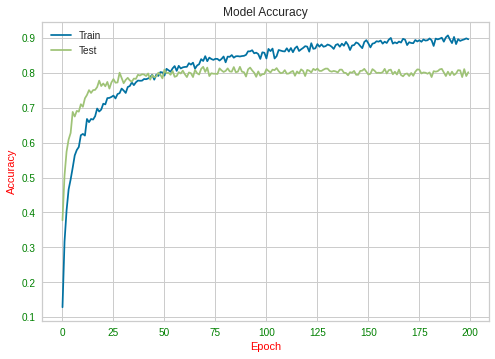

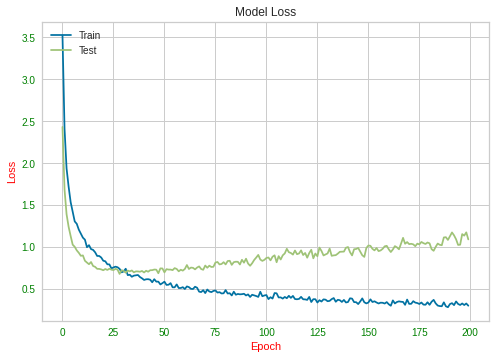

In [25]:
#model.save("Model_Species.h5")


#Plot training & validation accuracy values

label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]


plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

print('\n\n')

# Plot training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## **When the source country is also known**




In [245]:
## Checking and omitting the incomplete observations.

print(data.isnull().sum().sum())
data = data.dropna(how="any")
d = data.reset_index(drop=True)
x = d.select_dtypes(exclude=['object', 'category'])
x = x.drop(['Species_cat', 'Guild_cat', 'Genus_cat', 'Family_cat', 'File_cat'], axis=1)
y = d["Species_cat"]
print(x.columns)
len(y.value_counts())


print(len(x.columns))
type(x.columns)

## Preprocesing - Standardization
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)


## Splitting into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

0
Index(['Quality', 'CallDuration', 'Fc', 'HiFreq', 'LowFreq', 'Bndwdth',
       'FreqMaxPwr', 'PrcntMaxAmpDur', 'TimeFromMaxToFc', 'FreqKnee',
       'PrcntKneeDur', 'StartF', 'EndF', 'DominantSlope', 'SlopeAtFc',
       'StartSlope', 'EndSlope', 'SteepestSlope', 'LowestSlope', 'TotalSlope',
       'HiFtoKnSlope', 'KneeToFcSlope', 'CummNmlzdSlp', 'HiFtoFcExpAmp',
       'HiFtoFcDmp', 'KnToFcExpAmp', 'KnToFcDmp', 'HiFtoKnExpAmp',
       'HiFtoKnDmp', 'FreqLedge', 'LedgeDuration', 'FreqCtr', 'FBak32dB',
       'FFwd32dB', 'FBak20dB', 'FFwd20dB', 'FBak15dB', 'FFwd15dB', 'FBak5dB',
       'FFwd5dB', 'Bndw32dB', 'Bndw20dB', 'Bndw15dB', 'Bndw5dB', 'DurOf32dB',
       'DurOf20dB', 'DurOf15dB', 'DurOf5dB', 'Amp1stQrtl', 'Amp2ndQrtl',
       'Amp3rdQrtl', 'Amp4thQrtl', 'Amp1stMean', 'Amp2ndMean', 'Amp3rdMean',
       'Amp4thMean', 'LnExpA_StartAmp', 'LnExpB_StartAmp', 'AmpStartLn60ExpC',
       'LnExpA_EndAmp', 'LnExpB_EndAmp', 'AmpEndLn60ExpC', 'AmpK.start',
       'AmpK.end', 'AmpKurtosis', 

In [246]:
## Defining the Network Architecture

model = Sequential()

## Input layer and Hidden Layer 1
model.add(Dense(120, input_dim = 74, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.30, noise_shape=None, seed= None))


## Hidden Layer 2
model.add(Dense(85, activation="relu"))
model.add(Dropout(0.30, noise_shape=None, seed= None))


## Hidden Layer 3
model.add(Dense(65, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))


## Output Layer
model.add(Dense(59, activation="softmax"))

model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 120)               9000      
_________________________________________________________________
dropout_86 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_125 (Dense)            (None, 85)                10285     
_________________________________________________________________
dropout_87 (Dropout)         (None, 85)                0         
_________________________________________________________________
dense_126 (Dense)            (None, 65)                5590      
_________________________________________________________________
dropout_88 (Dropout)         (None, 65)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 59)              

In [247]:
#Compiling the model
ad = Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = ad, metrics = ['accuracy']) 


#Training
fit = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_test, y_test))

#callbacks = [EarlyStopping(patience=50)]

print("Training accuracy :", np.mean(fit.history["accuracy"]))
print("Validation accuracy :", np.mean(fit.history["val_accuracy"]))
print("\n\nAccuracy:\n")
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test score(Loss): ", score[0])
print("Test accuracy: ", score[1])

Epoch 1/200
398/398 [==============================] - 1s 2ms/step - loss: 3.4959 - accuracy: 0.1419 - val_loss: 2.4920 - val_accuracy: 0.3436
Epoch 2/200
398/398 [==============================] - 1s 2ms/step - loss: 2.4871 - accuracy: 0.3008 - val_loss: 1.7373 - val_accuracy: 0.5147
Epoch 3/200
398/398 [==============================] - 1s 2ms/step - loss: 2.0217 - accuracy: 0.3839 - val_loss: 1.3575 - val_accuracy: 0.6013
Epoch 4/200
398/398 [==============================] - 1s 2ms/step - loss: 1.7795 - accuracy: 0.4515 - val_loss: 1.1813 - val_accuracy: 0.6402
Epoch 5/200
398/398 [==============================] - 1s 2ms/step - loss: 1.5861 - accuracy: 0.5079 - val_loss: 1.0879 - val_accuracy: 0.6637
Epoch 6/200
398/398 [==============================] - 1s 2ms/step - loss: 1.4680 - accuracy: 0.5129 - val_loss: 0.9978 - val_accuracy: 0.6997
Epoch 7/200
398/398 [==============================] - 1s 2ms/step - loss: 1.3614 - accuracy: 0.5592 - val_loss: 0.9692 - val_accuracy: 0.7041

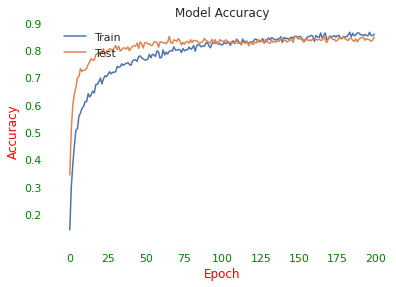

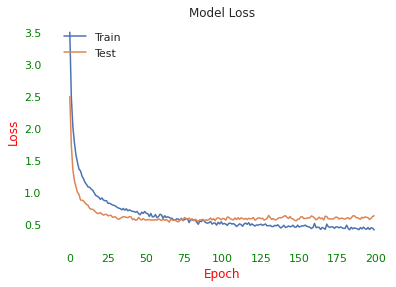

In [248]:
#model.save("Model.h5")

#Plot training & validation accuracy values


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]


plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

print('\n\n')

# Plot training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Dropout-based Feature Selection 

### **Prediction Performance on Each Specie**

In [249]:
model.save("Model_Species.h5")
y_pred = model.predict(x_test)

# Extracting the predicted class for the validation data from the probabilistic output.
y_pred1 = [a.tolist() for a in y_pred]
y_pred1 = [a.index(max(a)) for a in y_pred1]


print(type(y_pred1[1]))
print(y_pred[1])
print(y_pred1[1])
print(len(y_test))

<class 'int'>
[2.76366283e-29 2.46745840e-05 5.06819239e-12 4.18834448e-14
 3.65883928e-16 2.29184449e-09 2.99861438e-20 9.15368240e-18
 7.79507275e-12 1.05273280e-13 1.75894843e-09 9.75447067e-04
 3.77422868e-04 4.37731015e-13 2.21426505e-19 8.90286803e-11
 2.44798315e-07 1.68521055e-05 1.11382735e-11 1.28775625e-12
 9.94465530e-01 2.58950508e-14 2.01131882e-18 2.28286140e-13
 8.39004864e-13 3.61810462e-15 2.01117505e-16 1.47921429e-14
 7.05477845e-08 4.79102763e-18 8.37783131e-13 3.74424144e-20
 2.20236780e-06 3.36488420e-10 1.02380682e-11 5.42651610e-28
 8.85498725e-16 1.14633815e-11 2.72140082e-04 3.15081745e-11
 2.19170778e-13 1.03251782e-11 3.86495725e-03 1.40999777e-12
 1.02095380e-15 3.93686462e-23 1.98361284e-19 5.19957720e-19
 3.48268363e-23 6.16784488e-12 3.56976386e-08 3.54084223e-27
 1.59940368e-17 2.27237847e-17 1.58172669e-20 1.20846564e-21
 5.30221655e-07 1.51394637e-14 4.57404197e-16]
20
1362


In [262]:
## Generating a confusion matrix,

from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred1)
print(matrix)
s = data.Species.unique()
s
#data[data['Species_cat'] == 6]

[[13  0  0 ...  0  0  1]
 [ 0 18  0 ...  1  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 23]]


[Anogeo, Antpal, Artjam, Artlit, Balio, ..., Stulil, Stulud, Tadbra, Thytri, Tracir]
Length: 59
Categories (59, object): [Anogeo, Antpal, Artjam, Artlit, ..., Stulud, Tadbra, Thytri, Tracir]

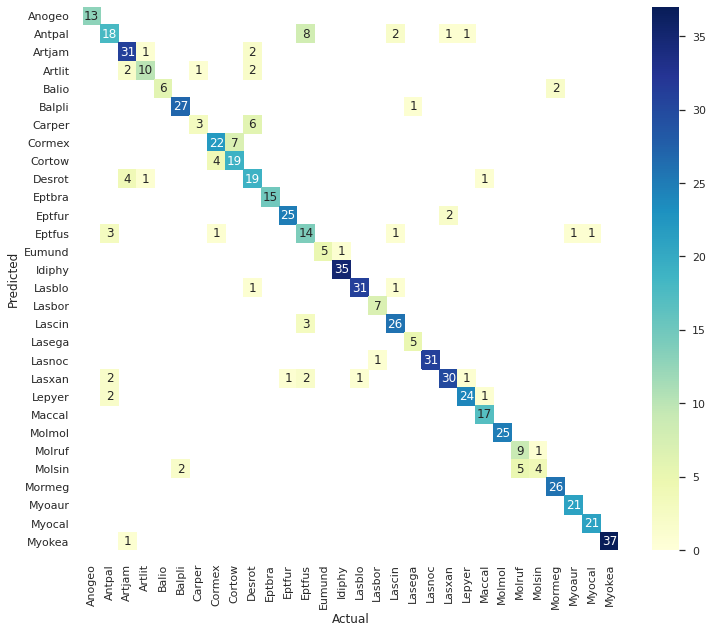

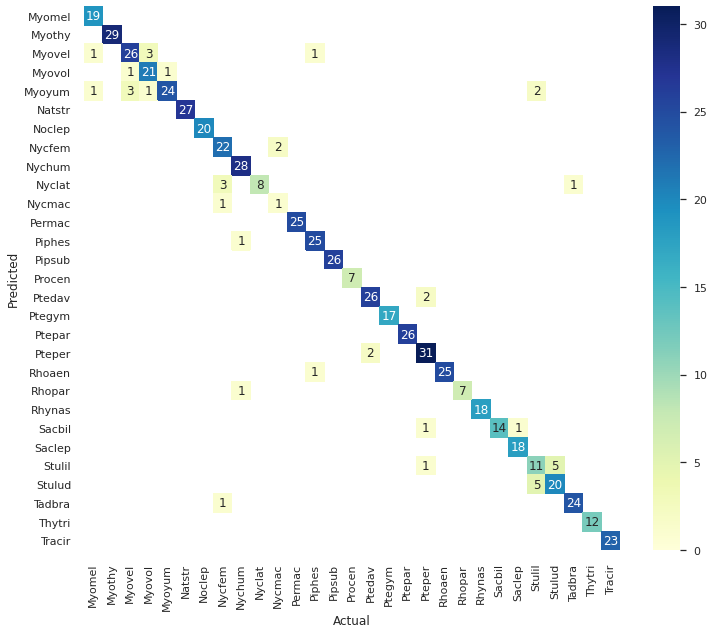

'\nprint(\'\n\')\n\ndf_cm = pd.DataFrame(matrix[15:30, 15:30], index = [i for i in s[15:30]],\n                  columns = [i for i in s[15:30]])\nplt.figure(figsize = (12,10))\nsb.heatmap(df_cm, annot=True, fmt = \'g\', cmap="YlGnBu")\nplt.xlabel("Actual")\nplt.ylabel("Predicted")\nplt.show()\n\nprint(\'\n\')\n\ndf_cm = pd.DataFrame(matrix[30:45, 30:45], index = [i for i in s[30:45]],\n                  columns = [i for i in s[30:45]])\nplt.figure(figsize = (12,10))\nsb.heatmap(df_cm, annot=True, fmt = \'g\', cmap="YlGnBu")\nplt.xlabel("Actual")\nplt.ylabel("Predicted")\nplt.show()\n\nprint(\'\n\')\n\ndf_cm = pd.DataFrame(matrix[45:59, 45:59], index = [i for i in s[45:59]],\n                  columns = [i for i in s[45:59]])\nplt.figure(figsize = (12.5,10))\nsb.heatmap(df_cm, annot=True, fmt = \'g\', cmap="YlGnBu")\nplt.xlabel("Actual")\nplt.ylabel("Predicted")\nplt.show()\n'

In [263]:
## Visualizing the Confusion matrix.

matrix = np.ma.masked_where(matrix == 0, matrix)


# Since there are 59 species, we visualize the matrix in two parts for a better understandability. 

df_cm = pd.DataFrame(matrix[0:30, 0:30], index = [i for i in s[0:30]],
                  columns = [i for i in s[0:30]])
plt.figure(figsize = (12,10))
sb.heatmap(df_cm, annot=True, fmt = 'g', cmap="YlGnBu", vmin= 0)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

df_cm = pd.DataFrame(matrix[30:59, 30:59], index = [i for i in s[30:59]],
                  columns = [i for i in s[30:59]])
plt.figure(figsize = (12,10))
sb.heatmap(df_cm, annot=True, fmt = 'g', cmap="YlGnBu", vmin= 0)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [41]:
## A classification report derived from confusion matrix
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred1, target_names= s)
print(report)

              precision    recall  f1-score   support

      Anogeo       0.81      0.93      0.87        14
      Antpal       0.65      0.65      0.65        31
      Artjam       0.81      0.85      0.83        34
      Artlit       0.93      0.70      0.80        20
       Balio       1.00      0.88      0.93         8
      Balpli       0.88      0.93      0.90        30
      Carper       0.50      0.11      0.18         9
      Cormex       0.80      0.77      0.79        31
      Cortow       0.67      0.70      0.68        23
      Desrot       0.61      0.85      0.71        26
      Eptbra       0.88      0.93      0.90        15
      Eptfur       0.88      0.64      0.74        33
      Eptfus       0.54      0.71      0.61        21
      Eumund       0.83      0.83      0.83         6
      Idiphy       0.89      0.97      0.93        35
      Lasblo       0.82      0.82      0.82        38
      Lasbor       1.00      0.41      0.58        17
      Lascin       0.92    

### **Feature Importance using Weights**

In [42]:
## Saving the weights of the trained model.

weights = model.get_weights()
print(weights[4].shape)

(85, 65)


In [43]:
## Extracting the updated final weights from the 1st layer of the network corresponding to each feature.  


#model = keras.models.load_model('Model.h5')

w = weights[0]
print(len(w[1]))


res = list() 
for i in range(0, len(w)): 
    tmp = 0
    for j in range(0, len(w[i])): 
        tmp = tmp + w[i][j] 
    res.append(tmp) 
print(len(res))

#df_a.reset_index(drop=True)
df = pd.concat([pd.Series(x.columns.tolist()), pd.Series(res)], axis=1)
df.columns = ['Feature','Weight']
df = df.sort_values('Weight', ascending=False)
d = df

120
74


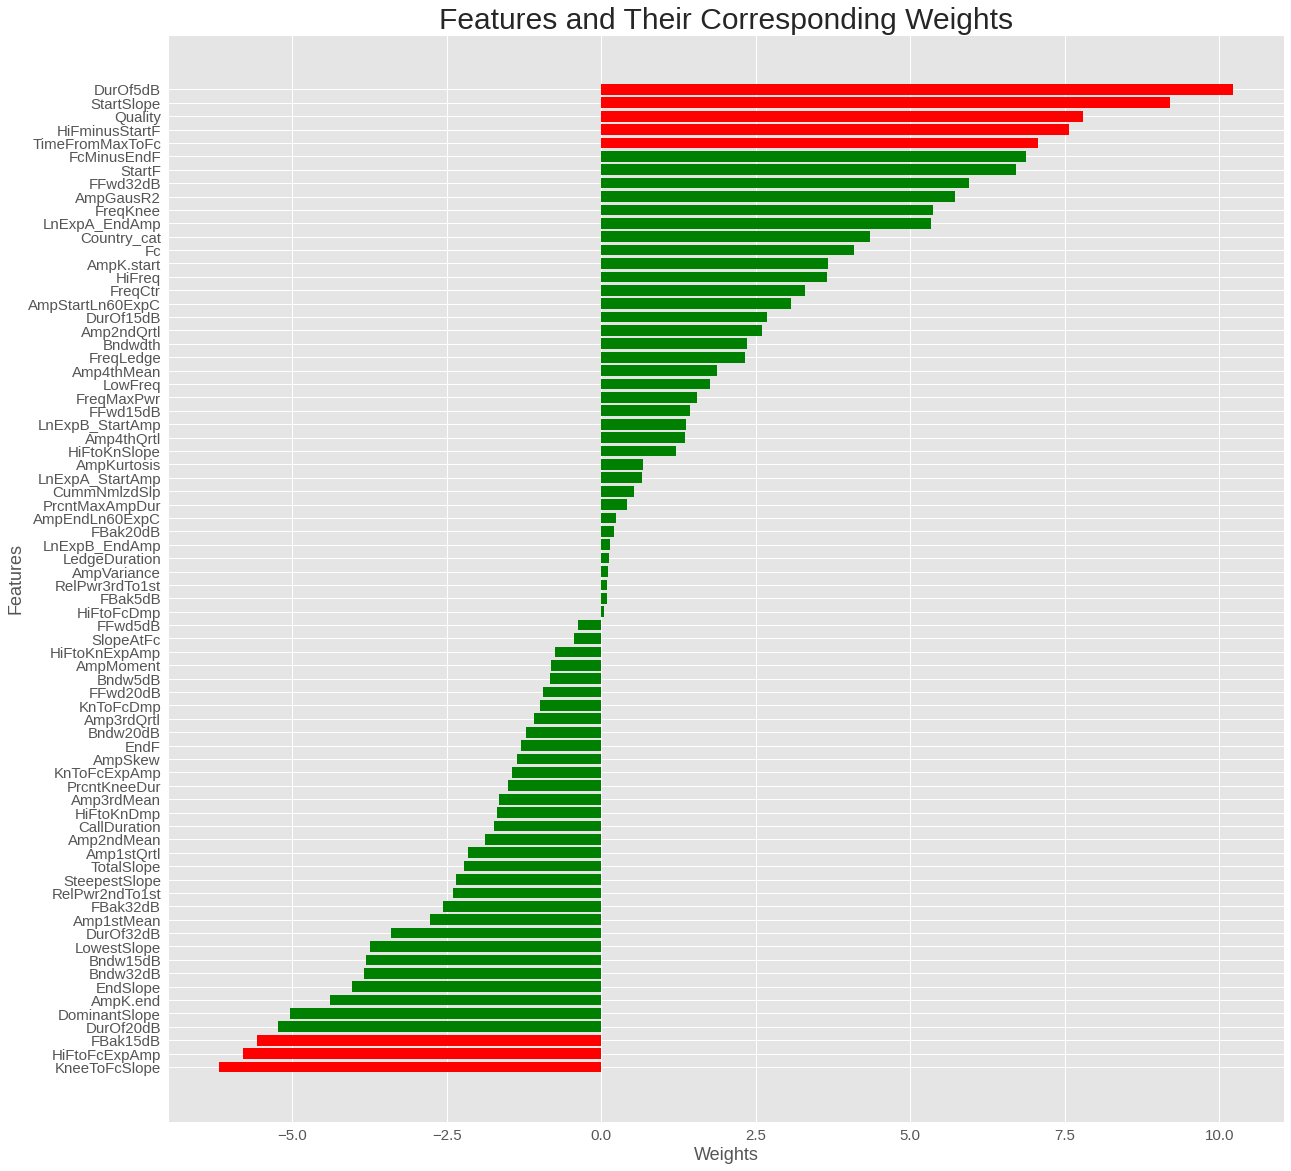

In [47]:
## Plotting the features vs weights. 


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
#energy = [5, 6, 15, 22, 24, 8]

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.figure(figsize=(20,20))
plt.barh(d.Feature[d.Weight > 7 ], d.Weight[d.Weight > 7 ], color='red')
plt.barh(d.Feature[d.Weight <= 7], d.Weight[d.Weight <= 7], color='green')
plt.barh(d.Feature[d.Weight < -5.5 ], d.Weight[d.Weight < -5.5 ], color='red')
plt.gca().invert_yaxis()
plt.xlabel("Weights", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Features and Their Corresponding Weights", fontsize=30)

#plt.xticks(x_pos, x)

plt.show()

## **Hierarchical Modeling**

### **When Family is Known**

In [56]:
print(data.isnull().sum().sum())
data = data.dropna(how="any")
d = data.reset_index(drop=True)
x = d.select_dtypes(exclude=['object', 'category'])
x = x.drop(['Species_cat', 'Genus_cat', 'Guild_cat', 'File_cat'], axis=1)
y = d["Species_cat"]
print(x.columns)
len(y.value_counts())
#print(y.isnull().any())
print(d.isnull().sum().sum())


# -------------------------------------------------------------------------------------------
# One-hot encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
#y = np_utils.to_categorical(encoded_Y)
#print(len(x.columns))
# -------------------------------------------------------------------------------------------

print(len(x.columns))

## Preprocesing - scaling
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)



x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)
#print(len(x_train))

0
Index(['Quality', 'CallDuration', 'Fc', 'HiFreq', 'LowFreq', 'Bndwdth',
       'FreqMaxPwr', 'PrcntMaxAmpDur', 'TimeFromMaxToFc', 'FreqKnee',
       'PrcntKneeDur', 'StartF', 'EndF', 'DominantSlope', 'SlopeAtFc',
       'StartSlope', 'EndSlope', 'SteepestSlope', 'LowestSlope', 'TotalSlope',
       'HiFtoKnSlope', 'KneeToFcSlope', 'CummNmlzdSlp', 'HiFtoFcExpAmp',
       'HiFtoFcDmp', 'KnToFcExpAmp', 'KnToFcDmp', 'HiFtoKnExpAmp',
       'HiFtoKnDmp', 'FreqLedge', 'LedgeDuration', 'FreqCtr', 'FBak32dB',
       'FFwd32dB', 'FBak20dB', 'FFwd20dB', 'FBak15dB', 'FFwd15dB', 'FBak5dB',
       'FFwd5dB', 'Bndw32dB', 'Bndw20dB', 'Bndw15dB', 'Bndw5dB', 'DurOf32dB',
       'DurOf20dB', 'DurOf15dB', 'DurOf5dB', 'Amp1stQrtl', 'Amp2ndQrtl',
       'Amp3rdQrtl', 'Amp4thQrtl', 'Amp1stMean', 'Amp2ndMean', 'Amp3rdMean',
       'Amp4thMean', 'LnExpA_StartAmp', 'LnExpB_StartAmp', 'AmpStartLn60ExpC',
       'LnExpA_EndAmp', 'LnExpB_EndAmp', 'AmpEndLn60ExpC', 'AmpK.start',
       'AmpK.end', 'AmpKurtosis', 

In [57]:
model = Sequential()

## Input layer and Hidden Layer 1
model.add(Dense(120, input_dim = 75, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.30, noise_shape=None, seed= None))


## Hidden Layer 2
model.add(Dense(85, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))


## Hidden Layer 3
model.add(Dense(65, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))


## Output Layer
model.add(Dense(59, activation="softmax"))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 120)               9120      
_________________________________________________________________
dropout_20 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 85)                10285     
_________________________________________________________________
dropout_21 (Dropout)         (None, 85)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 65)                5590      
_________________________________________________________________
dropout_22 (Dropout)         (None, 65)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 59)               

In [58]:
#Compiling the model
ad = Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = ad, metrics = ['accuracy']) 


#Training
fit = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_test, y_test))

print("Training accuracy :", np.mean(fit.history["accuracy"]))
print("Validation accuracy :", np.mean(fit.history["val_accuracy"]))
print("\n\nAccuracy:\n")
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test score(Loss): ", score[0])
print("Test accuracy: ", score[1])

Epoch 1/200
426/426 [==============================] - 1s 2ms/step - loss: 3.4352 - accuracy: 0.1416 - val_loss: 2.1905 - val_accuracy: 0.4388
Epoch 2/200
426/426 [==============================] - 1s 2ms/step - loss: 2.2541 - accuracy: 0.3389 - val_loss: 1.4877 - val_accuracy: 0.5709
Epoch 3/200
426/426 [==============================] - 1s 2ms/step - loss: 1.7764 - accuracy: 0.4488 - val_loss: 1.1945 - val_accuracy: 0.6414
Epoch 4/200
426/426 [==============================] - 1s 2ms/step - loss: 1.5516 - accuracy: 0.5043 - val_loss: 1.0419 - val_accuracy: 0.6775
Epoch 5/200
426/426 [==============================] - 1s 2ms/step - loss: 1.3921 - accuracy: 0.5518 - val_loss: 0.9240 - val_accuracy: 0.7093
Epoch 6/200
426/426 [==============================] - 1s 2ms/step - loss: 1.3059 - accuracy: 0.5736 - val_loss: 0.8650 - val_accuracy: 0.7269
Epoch 7/200
426/426 [==============================] - 1s 2ms/step - loss: 1.2016 - accuracy: 0.5927 - val_loss: 0.8360 - val_accuracy: 0.7410

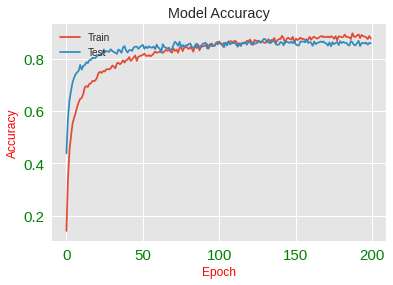

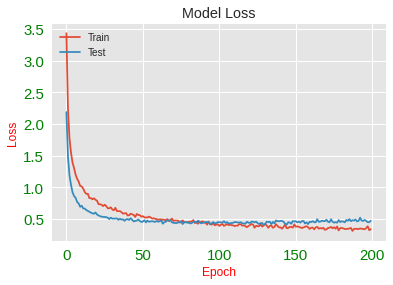

In [59]:
#model.save("Model.h5")

#Plot training & validation accuracy values


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]


plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

print('\n\n')

# Plot training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(85, 65)
120
75


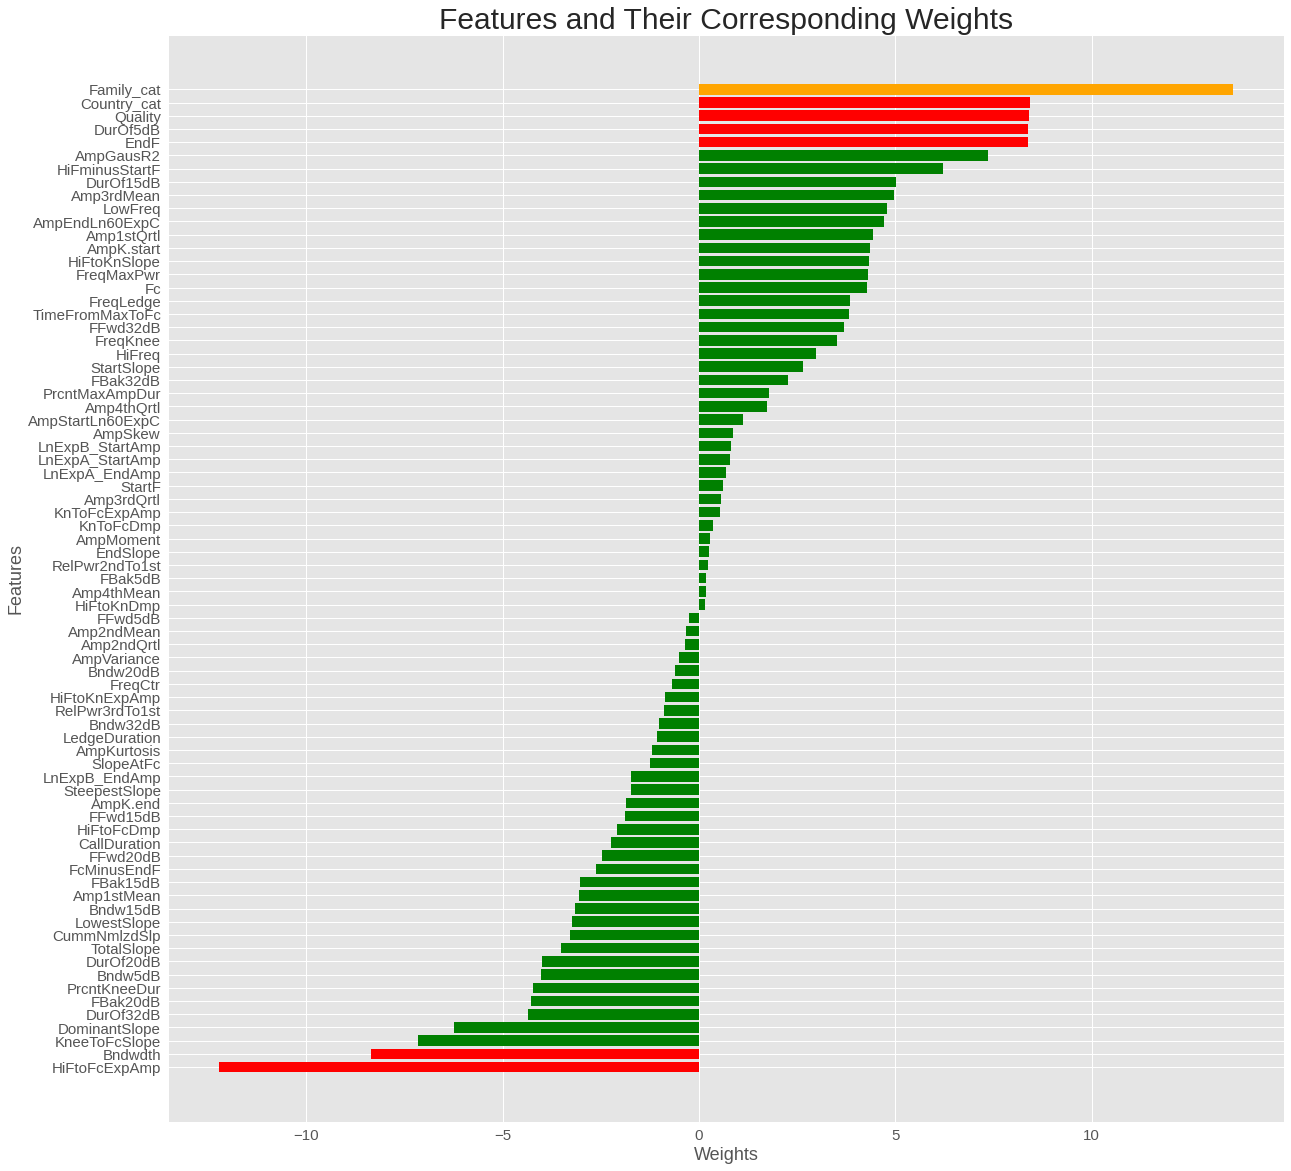

In [64]:
#model = keras.models.load_model('Model.h5')
weights = model.get_weights()
print(weights[4].shape)

weights = model.get_weights()
w = weights[0]
print(len(w[1]))


res = list() 
for i in range(0, len(w)): 
    tmp = 0
    for j in range(0, len(w[i])): 
        tmp = tmp + w[i][j] 
    res.append(tmp) 
print(len(res))

#df_a.reset_index(drop=True)
df = pd.concat([pd.Series(x.columns.tolist()), pd.Series(res)], axis=1)
df.columns = ['Feature','Weight']
df = df.sort_values('Weight', ascending=False)
d = df

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
#energy = [5, 6, 15, 22, 24, 8]

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.figure(figsize=(20,20))

plt.barh(d.Feature[d.Weight > 7.5 ], d.Weight[d.Weight > 7.5 ], color='red')
plt.barh(d.Feature[d.Weight > 10 ], d.Weight[d.Weight > 10 ], color='Orange')
plt.barh(d.Feature[d.Weight <= 7.5], d.Weight[d.Weight <= 7.5], color='green')
plt.barh(d.Feature[d.Weight < -7.5 ], d.Weight[d.Weight < -7.5 ], color='red')
plt.gca().invert_yaxis()
plt.xlabel("Weights", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Features and Their Corresponding Weights", fontsize=30)

#plt.xticks(x_pos, x)

plt.show()

### **When Genus is Known**

In [75]:
print(data.isnull().sum().sum())
data = data.dropna(how="any")
d = data.reset_index(drop=True)
x = d.select_dtypes(exclude=['object', 'category'])
x = x.drop(['Species_cat', 'Guild_cat', 'Family_cat', 'File_cat'], axis=1)
y = d["Species_cat"]
print(x.columns)
len(y.value_counts())
#print(y.isnull().any())
print(d.isnull().sum().sum())


# -------------------------------------------------------------------------------------------
# One-hot encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
#y = np_utils.to_categorical(encoded_Y)
#print(len(x.columns))
# -------------------------------------------------------------------------------------------

print(len(x.columns))

## Preprocesing - scaling
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)



x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
#print(len(x_train))

0
Index(['Quality', 'CallDuration', 'Fc', 'HiFreq', 'LowFreq', 'Bndwdth',
       'FreqMaxPwr', 'PrcntMaxAmpDur', 'TimeFromMaxToFc', 'FreqKnee',
       'PrcntKneeDur', 'StartF', 'EndF', 'DominantSlope', 'SlopeAtFc',
       'StartSlope', 'EndSlope', 'SteepestSlope', 'LowestSlope', 'TotalSlope',
       'HiFtoKnSlope', 'KneeToFcSlope', 'CummNmlzdSlp', 'HiFtoFcExpAmp',
       'HiFtoFcDmp', 'KnToFcExpAmp', 'KnToFcDmp', 'HiFtoKnExpAmp',
       'HiFtoKnDmp', 'FreqLedge', 'LedgeDuration', 'FreqCtr', 'FBak32dB',
       'FFwd32dB', 'FBak20dB', 'FFwd20dB', 'FBak15dB', 'FFwd15dB', 'FBak5dB',
       'FFwd5dB', 'Bndw32dB', 'Bndw20dB', 'Bndw15dB', 'Bndw5dB', 'DurOf32dB',
       'DurOf20dB', 'DurOf15dB', 'DurOf5dB', 'Amp1stQrtl', 'Amp2ndQrtl',
       'Amp3rdQrtl', 'Amp4thQrtl', 'Amp1stMean', 'Amp2ndMean', 'Amp3rdMean',
       'Amp4thMean', 'LnExpA_StartAmp', 'LnExpB_StartAmp', 'AmpStartLn60ExpC',
       'LnExpA_EndAmp', 'LnExpB_EndAmp', 'AmpEndLn60ExpC', 'AmpK.start',
       'AmpK.end', 'AmpKurtosis', 

In [99]:
model = Sequential()

## Input layer and Hidden Layer 1
model.add(Dense(120, input_dim = 75, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.30, noise_shape=None, seed= None))

## Hidden Layer 2
model.add(Dense(85, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))

## Hidden Layer 3
model.add(Dense(65, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))


## Output Layer
model.add(Dense(59, activation="softmax"))

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 120)               9120      
_________________________________________________________________
dropout_50 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 85)                10285     
_________________________________________________________________
dropout_51 (Dropout)         (None, 85)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 65)                5590      
_________________________________________________________________
dropout_52 (Dropout)         (None, 65)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 59)              

In [100]:
#Compiling the model
ad = Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = ad, metrics = ['accuracy']) 


#Training
fit = model.fit(x_train, y_train, epochs = 150, batch_size = 8, validation_data = (x_test, y_test))

print("Training accuracy :", np.mean(fit.history["accuracy"]))
print("Validation accuracy :", np.mean(fit.history["val_accuracy"]))
print("\n\nAccuracy:\n")
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test score(Loss): ", score[0])
print("Test accuracy: ", score[1])

Epoch 1/150
398/398 [==============================] - 1s 2ms/step - loss: 3.5666 - accuracy: 0.1293 - val_loss: 2.5516 - val_accuracy: 0.3473
Epoch 2/150
398/398 [==============================] - 1s 2ms/step - loss: 2.4201 - accuracy: 0.3046 - val_loss: 1.5501 - val_accuracy: 0.5712
Epoch 3/150
398/398 [==============================] - 1s 2ms/step - loss: 1.8385 - accuracy: 0.4333 - val_loss: 1.1512 - val_accuracy: 0.6608
Epoch 4/150
398/398 [==============================] - 1s 2ms/step - loss: 1.5226 - accuracy: 0.5006 - val_loss: 0.9717 - val_accuracy: 0.7093
Epoch 5/150
398/398 [==============================] - 1s 2ms/step - loss: 1.3763 - accuracy: 0.5422 - val_loss: 0.8774 - val_accuracy: 0.7364
Epoch 6/150
398/398 [==============================] - 1s 2ms/step - loss: 1.2135 - accuracy: 0.5919 - val_loss: 0.7908 - val_accuracy: 0.7533
Epoch 7/150
398/398 [==============================] - 1s 2ms/step - loss: 1.1258 - accuracy: 0.6237 - val_loss: 0.7383 - val_accuracy: 0.7636

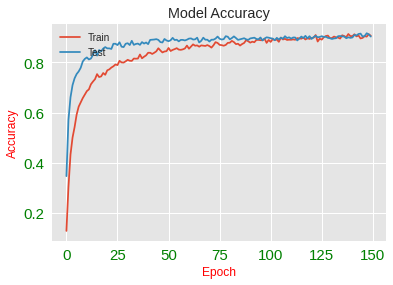

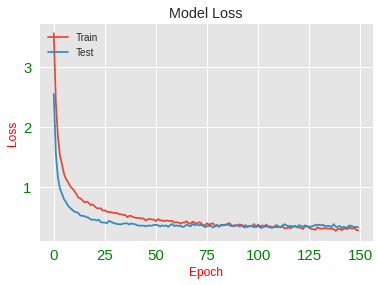

In [101]:
#model.save("Model.h5")

#Plot training & validation accuracy values


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]


plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

print('\n\n')

# Plot training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(85, 65)
120
75


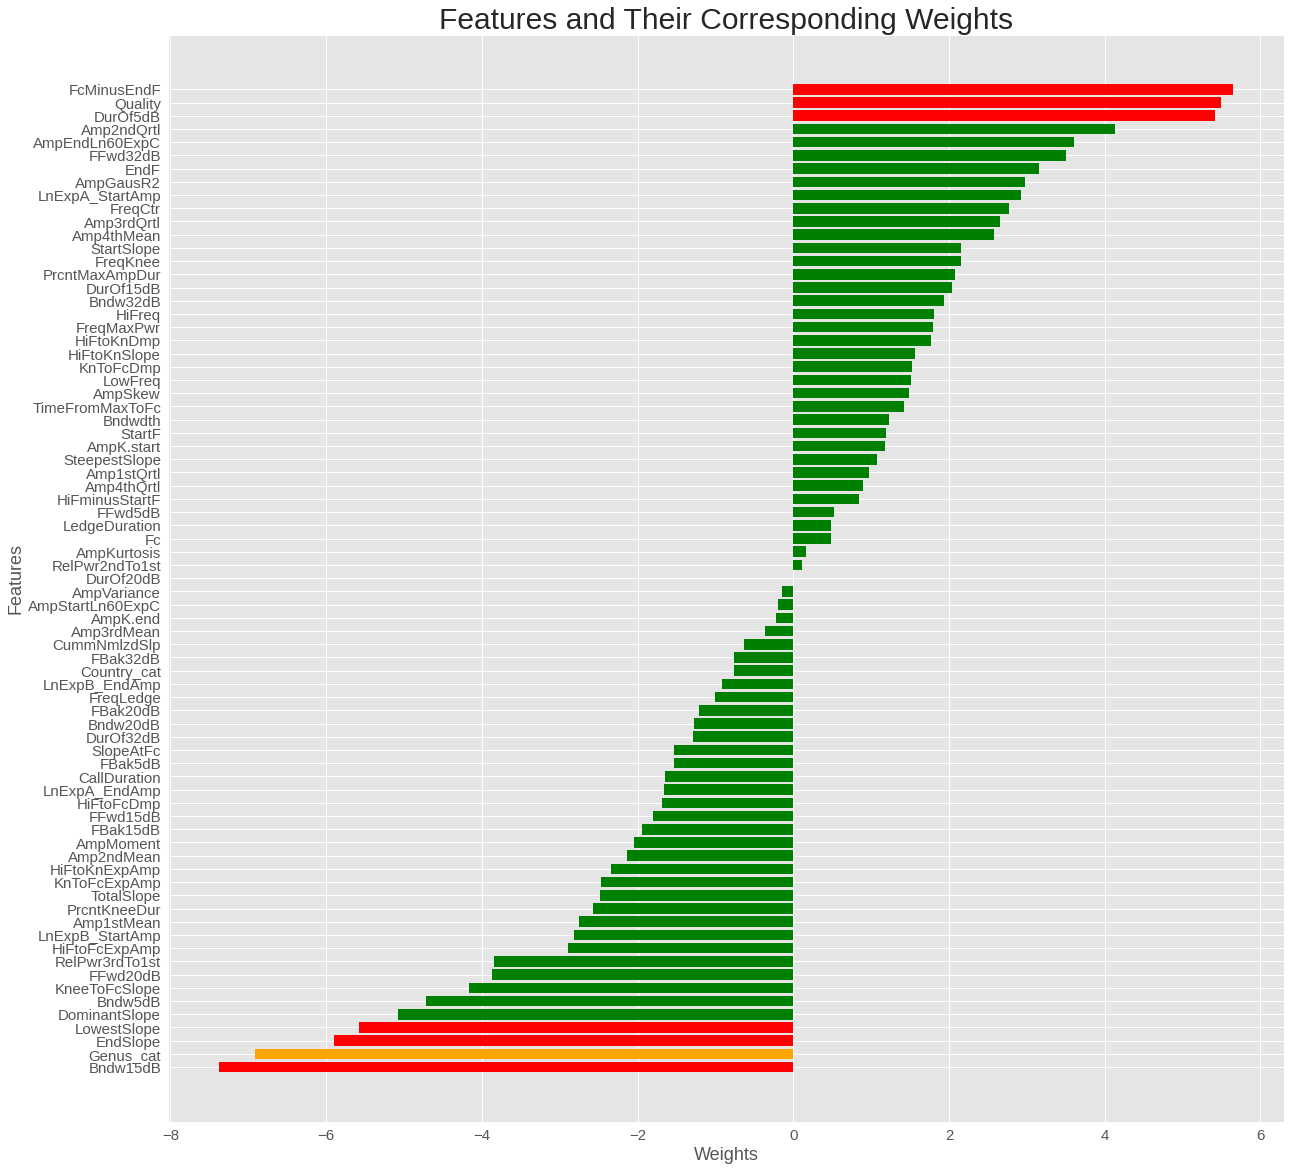

In [94]:
#model = keras.models.load_model('Model.h5')
weights = model.get_weights()
print(weights[4].shape)

weights = model.get_weights()
w = weights[0]
print(len(w[1]))


res = list() 
for i in range(0, len(w)): 
    tmp = 0
    for j in range(0, len(w[i])): 
        tmp = tmp + w[i][j] 
    res.append(tmp) 
print(len(res))

#df_a.reset_index(drop=True)
df = pd.concat([pd.Series(x.columns.tolist()), pd.Series(res)], axis=1)
df.columns = ['Feature','Weight']
df = df.sort_values('Weight', ascending=False)
d = df

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
#energy = [5, 6, 15, 22, 24, 8]

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.figure(figsize=(20,20))

plt.barh(d.Feature[d.Weight > 5 ], d.Weight[d.Weight > 5 ], color='red')
plt.barh(d.Feature[d.Weight <= 5], d.Weight[d.Weight <= 5], color='green')
plt.barh(d.Feature[d.Weight < -5.5 ], d.Weight[d.Weight < -5.5 ], color='red')
plt.barh(d.Feature[d.Weight < -6 ], d.Weight[d.Weight < -6 ], color='Orange')
plt.barh(d.Feature[d.Weight < -7 ], d.Weight[d.Weight < -7 ], color='red')
plt.gca().invert_yaxis()
plt.xlabel("Weights", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Features and Their Corresponding Weights", fontsize=30)

#plt.xticks(x_pos, x)

plt.show()

### **When Guild is Known *(Extra)*** 

In [21]:
print(data.isnull().sum().sum())
data = data.dropna(how="any")
d = data.reset_index(drop=True)
x = d.select_dtypes(exclude=['object', 'category'])
x = x.drop(['Species_cat', 'Genus_cat', 'Family_cat', 'File_cat'], axis=1)
y = d["Species_cat"]
print(x.columns)
len(y.value_counts())
#print(y.isnull().any())
print(d.isnull().sum().sum())


# -------------------------------------------------------------------------------------------
# One-hot encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
#y = np_utils.to_categorical(encoded_Y)
#print(len(x.columns))
# -------------------------------------------------------------------------------------------

print(len(x.columns))

## Preprocesing - scaling
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)



x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
#print(len(x_train))

0
Index(['Quality', 'CallDuration', 'Fc', 'HiFreq', 'LowFreq', 'Bndwdth',
       'FreqMaxPwr', 'PrcntMaxAmpDur', 'TimeFromMaxToFc', 'FreqKnee',
       'PrcntKneeDur', 'StartF', 'EndF', 'DominantSlope', 'SlopeAtFc',
       'StartSlope', 'EndSlope', 'SteepestSlope', 'LowestSlope', 'TotalSlope',
       'HiFtoKnSlope', 'KneeToFcSlope', 'CummNmlzdSlp', 'HiFtoFcExpAmp',
       'HiFtoFcDmp', 'KnToFcExpAmp', 'KnToFcDmp', 'HiFtoKnExpAmp',
       'HiFtoKnDmp', 'FreqLedge', 'LedgeDuration', 'FreqCtr', 'FBak32dB',
       'FFwd32dB', 'FBak20dB', 'FFwd20dB', 'FBak15dB', 'FFwd15dB', 'FBak5dB',
       'FFwd5dB', 'Bndw32dB', 'Bndw20dB', 'Bndw15dB', 'Bndw5dB', 'DurOf32dB',
       'DurOf20dB', 'DurOf15dB', 'DurOf5dB', 'Amp1stQrtl', 'Amp2ndQrtl',
       'Amp3rdQrtl', 'Amp4thQrtl', 'Amp1stMean', 'Amp2ndMean', 'Amp3rdMean',
       'Amp4thMean', 'LnExpA_StartAmp', 'LnExpB_StartAmp', 'AmpStartLn60ExpC',
       'LnExpA_EndAmp', 'LnExpB_EndAmp', 'AmpEndLn60ExpC', 'AmpK.start',
       'AmpK.end', 'AmpKurtosis', 

In [22]:
model = Sequential()

## Input layer and Hidden Layer 1
model.add(Dense(120, input_dim = 75, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.30, noise_shape=None, seed= None))

## Hidden Layer 2
model.add(Dense(85, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))

## Hidden Layer 3
model.add(Dense(65, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))


## Output Layer
model.add(Dense(59, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 120)               9120      
_________________________________________________________________
dropout_3 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 85)                10285     
_________________________________________________________________
dropout_4 (Dropout)          (None, 85)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 65)                5590      
_________________________________________________________________
dropout_5 (Dropout)          (None, 65)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 59)               

In [23]:
#Compiling the model
ad = Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = ad, metrics = ['accuracy']) 


#Training
fit = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_test, y_test))

print("Training accuracy :", np.mean(fit.history["accuracy"]))
print("Validation accuracy :", np.mean(fit.history["val_accuracy"]))
print("\n\nAccuracy:\n")
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test score(Loss): ", score[0])
print("Test accuracy: ", score[1])

Epoch 1/200
398/398 [==============================] - 1s 2ms/step - loss: 3.4985 - accuracy: 0.1419 - val_loss: 2.4096 - val_accuracy: 0.3862
Epoch 2/200
398/398 [==============================] - 1s 2ms/step - loss: 2.3151 - accuracy: 0.3490 - val_loss: 1.5328 - val_accuracy: 0.5441
Epoch 3/200
398/398 [==============================] - 1s 2ms/step - loss: 1.8035 - accuracy: 0.4418 - val_loss: 1.2026 - val_accuracy: 0.6512
Epoch 4/200
398/398 [==============================] - 1s 2ms/step - loss: 1.5415 - accuracy: 0.5129 - val_loss: 0.9851 - val_accuracy: 0.6960
Epoch 5/200
398/398 [==============================] - 1s 2ms/step - loss: 1.3762 - accuracy: 0.5548 - val_loss: 0.8912 - val_accuracy: 0.7195
Epoch 6/200
398/398 [==============================] - 1s 2ms/step - loss: 1.2628 - accuracy: 0.5774 - val_loss: 0.8198 - val_accuracy: 0.7533
Epoch 7/200
398/398 [==============================] - 1s 2ms/step - loss: 1.1706 - accuracy: 0.6183 - val_loss: 0.7453 - val_accuracy: 0.7636

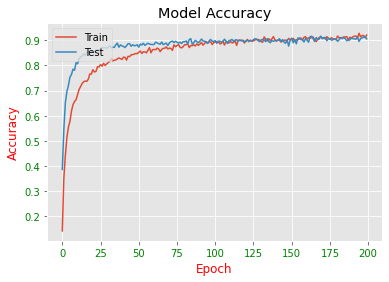

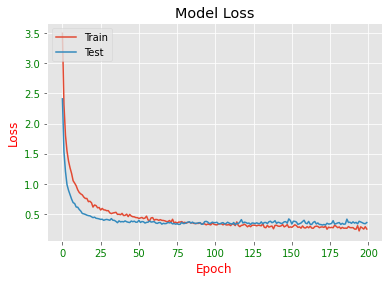

In [24]:
#model.save("Model.h5")

#Plot training & validation accuracy values


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]


plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

print('\n\n')

# Plot training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
#model = keras.models.load_model('Model.h5')


weights = model.get_weights()
w = weights[0]
print(len(w[1]))


res = list() 
for i in range(0, len(w)): 
    tmp = 0
    for j in range(0, len(w[i])): 
        tmp = tmp + w[i][j] 
    res.append(tmp) 
print(len(res))

#df_a.reset_index(drop=True)
df = pd.concat([pd.Series(x.columns.tolist()), pd.Series(res)], axis=1)
df.columns = ['Feature','Weight']
df = df.sort_values('Weight', ascending=False)
d = df

120
75


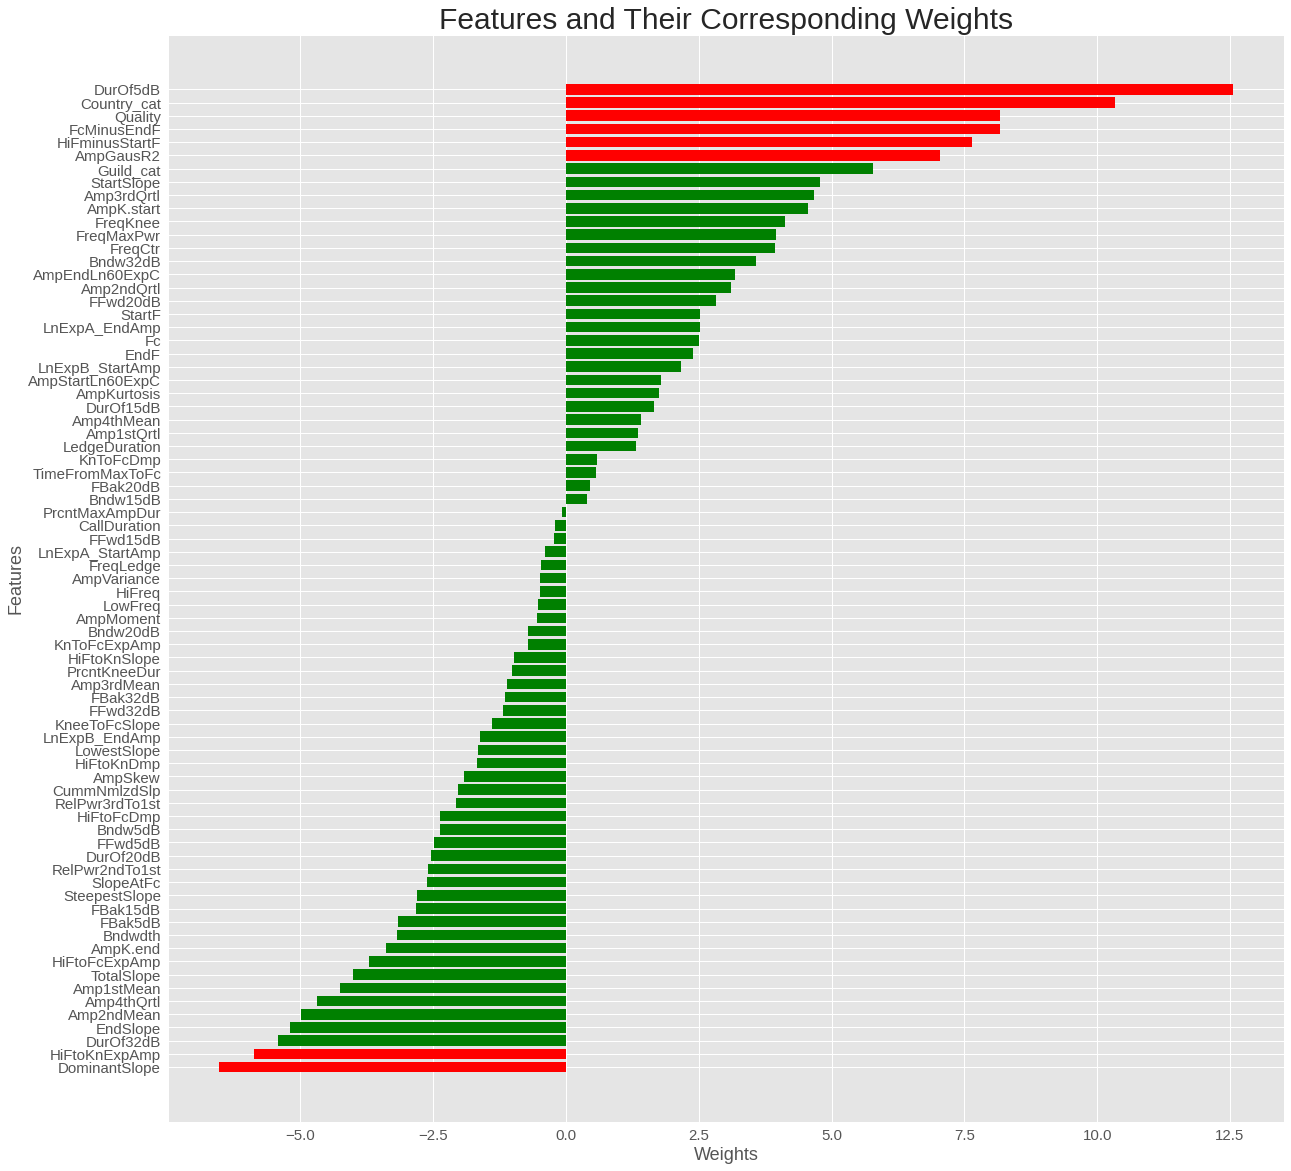

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
#energy = [5, 6, 15, 22, 24, 8]

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.figure(figsize=(20,20))
plt.barh(d.Feature[d.Weight > 7 ], d.Weight[d.Weight > 7 ], color='red')
plt.barh(d.Feature[d.Weight <= 7], d.Weight[d.Weight <= 7], color='green')
plt.barh(d.Feature[d.Weight < -5.5 ], d.Weight[d.Weight < -5.5 ], color='red')
plt.gca().invert_yaxis()
plt.xlabel("Weights", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Features and Their Corresponding Weights", fontsize=30)

#plt.xticks(x_pos, x)

plt.show()

# **Neural Network for Classifying the Family**

In [264]:
print(data.isnull().sum().sum())
data = data.dropna(how="any")
d = data.reset_index(drop=True)
x = d.select_dtypes(exclude=['object', 'category'])
x = x.drop(['Species_cat', 'Genus_cat', 'Guild_cat', 'Family_cat', 'File_cat'], axis=1)
y = d["Family_cat"]
print(x.columns)
len(y.value_counts())
#print(y.isnull().any())
print(d.isnull().sum().sum())


# -------------------------------------------------------------------------------------------
# One-hot encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
#y = np_utils.to_categorical(encoded_Y)
#print(len(x.columns))
# -------------------------------------------------------------------------------------------

print(len(x.columns))

## Preprocesing - scaling
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)



x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
#print(len(x_train))

0
Index(['Quality', 'CallDuration', 'Fc', 'HiFreq', 'LowFreq', 'Bndwdth',
       'FreqMaxPwr', 'PrcntMaxAmpDur', 'TimeFromMaxToFc', 'FreqKnee',
       'PrcntKneeDur', 'StartF', 'EndF', 'DominantSlope', 'SlopeAtFc',
       'StartSlope', 'EndSlope', 'SteepestSlope', 'LowestSlope', 'TotalSlope',
       'HiFtoKnSlope', 'KneeToFcSlope', 'CummNmlzdSlp', 'HiFtoFcExpAmp',
       'HiFtoFcDmp', 'KnToFcExpAmp', 'KnToFcDmp', 'HiFtoKnExpAmp',
       'HiFtoKnDmp', 'FreqLedge', 'LedgeDuration', 'FreqCtr', 'FBak32dB',
       'FFwd32dB', 'FBak20dB', 'FFwd20dB', 'FBak15dB', 'FFwd15dB', 'FBak5dB',
       'FFwd5dB', 'Bndw32dB', 'Bndw20dB', 'Bndw15dB', 'Bndw5dB', 'DurOf32dB',
       'DurOf20dB', 'DurOf15dB', 'DurOf5dB', 'Amp1stQrtl', 'Amp2ndQrtl',
       'Amp3rdQrtl', 'Amp4thQrtl', 'Amp1stMean', 'Amp2ndMean', 'Amp3rdMean',
       'Amp4thMean', 'LnExpA_StartAmp', 'LnExpB_StartAmp', 'AmpStartLn60ExpC',
       'LnExpA_EndAmp', 'LnExpB_EndAmp', 'AmpEndLn60ExpC', 'AmpK.start',
       'AmpK.end', 'AmpKurtosis', 

In [265]:
model = Sequential()

## Input layer and Hidden Layer 1
model.add(Dense(120, input_dim = 74, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.35, noise_shape=None, seed= None))

## Hidden Layer 2
model.add(Dense(85, activation="relu"))
model.add(Dropout(0.30, noise_shape=None, seed= None))

## Hidden Layer 3
model.add(Dense(65, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))


## Output Layer
model.add(Dense(8, activation="softmax"))

model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 120)               9000      
_________________________________________________________________
dropout_89 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_129 (Dense)            (None, 85)                10285     
_________________________________________________________________
dropout_90 (Dropout)         (None, 85)                0         
_________________________________________________________________
dense_130 (Dense)            (None, 65)                5590      
_________________________________________________________________
dropout_91 (Dropout)         (None, 65)                0         
_________________________________________________________________
dense_131 (Dense)            (None, 8)               

In [266]:
#Compiling the model
ad = Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = ad, metrics = ['accuracy']) 


#Training
fit = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_test, y_test))

print("Training accuracy :", np.mean(fit.history["accuracy"]))
print("Validation accuracy :", np.mean(fit.history["val_accuracy"]))
print("\n\nAccuracy:\n")
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test score(Loss): ", score[0])
print("Test accuracy: ", score[1])

Epoch 1/200
398/398 [==============================] - 1s 2ms/step - loss: 1.1358 - accuracy: 0.6296 - val_loss: 0.5087 - val_accuracy: 0.8069
Epoch 2/200
398/398 [==============================] - 1s 2ms/step - loss: 0.5851 - accuracy: 0.7926 - val_loss: 0.3452 - val_accuracy: 0.8708
Epoch 3/200
398/398 [==============================] - 1s 2ms/step - loss: 0.4504 - accuracy: 0.8298 - val_loss: 0.2846 - val_accuracy: 0.8965
Epoch 4/200
398/398 [==============================] - 1s 2ms/step - loss: 0.3960 - accuracy: 0.8615 - val_loss: 0.2552 - val_accuracy: 0.8987
Epoch 5/200
398/398 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8751 - val_loss: 0.2457 - val_accuracy: 0.9156
Epoch 6/200
398/398 [==============================] - 1s 2ms/step - loss: 0.3133 - accuracy: 0.8842 - val_loss: 0.2116 - val_accuracy: 0.9229
Epoch 7/200
398/398 [==============================] - 1s 2ms/step - loss: 0.3008 - accuracy: 0.8899 - val_loss: 0.1906 - val_accuracy: 0.9229

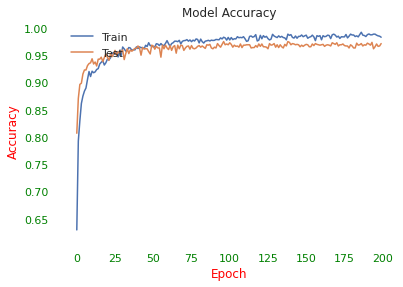

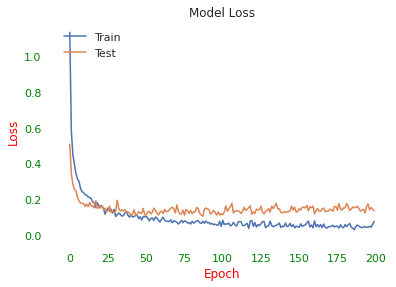

In [267]:
#Plot training & validation accuracy values


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]


plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

print('\n\n')
 
# Plot training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### **Feature Importance using Weights**

In [268]:
#model = keras.models.load_model('Model.h5')
weights = model.get_weights()
print(weights[4].shape)
weights = model.get_weights()
w = weights[0]
print(len(w[1]))


res = list() 
for i in range(0, len(w)): 
    tmp = 0
    for j in range(0, len(w[i])): 
        tmp = tmp + w[i][j] 
    res.append(tmp) 
print(len(res))

#df_a.reset_index(drop=True)
df = pd.concat([pd.Series(x.columns.tolist()), pd.Series(res)], axis=1)
df.columns = ['Feature','Weight']
df = df.sort_values('Weight', ascending=False)
d = df

(85, 65)
120
74


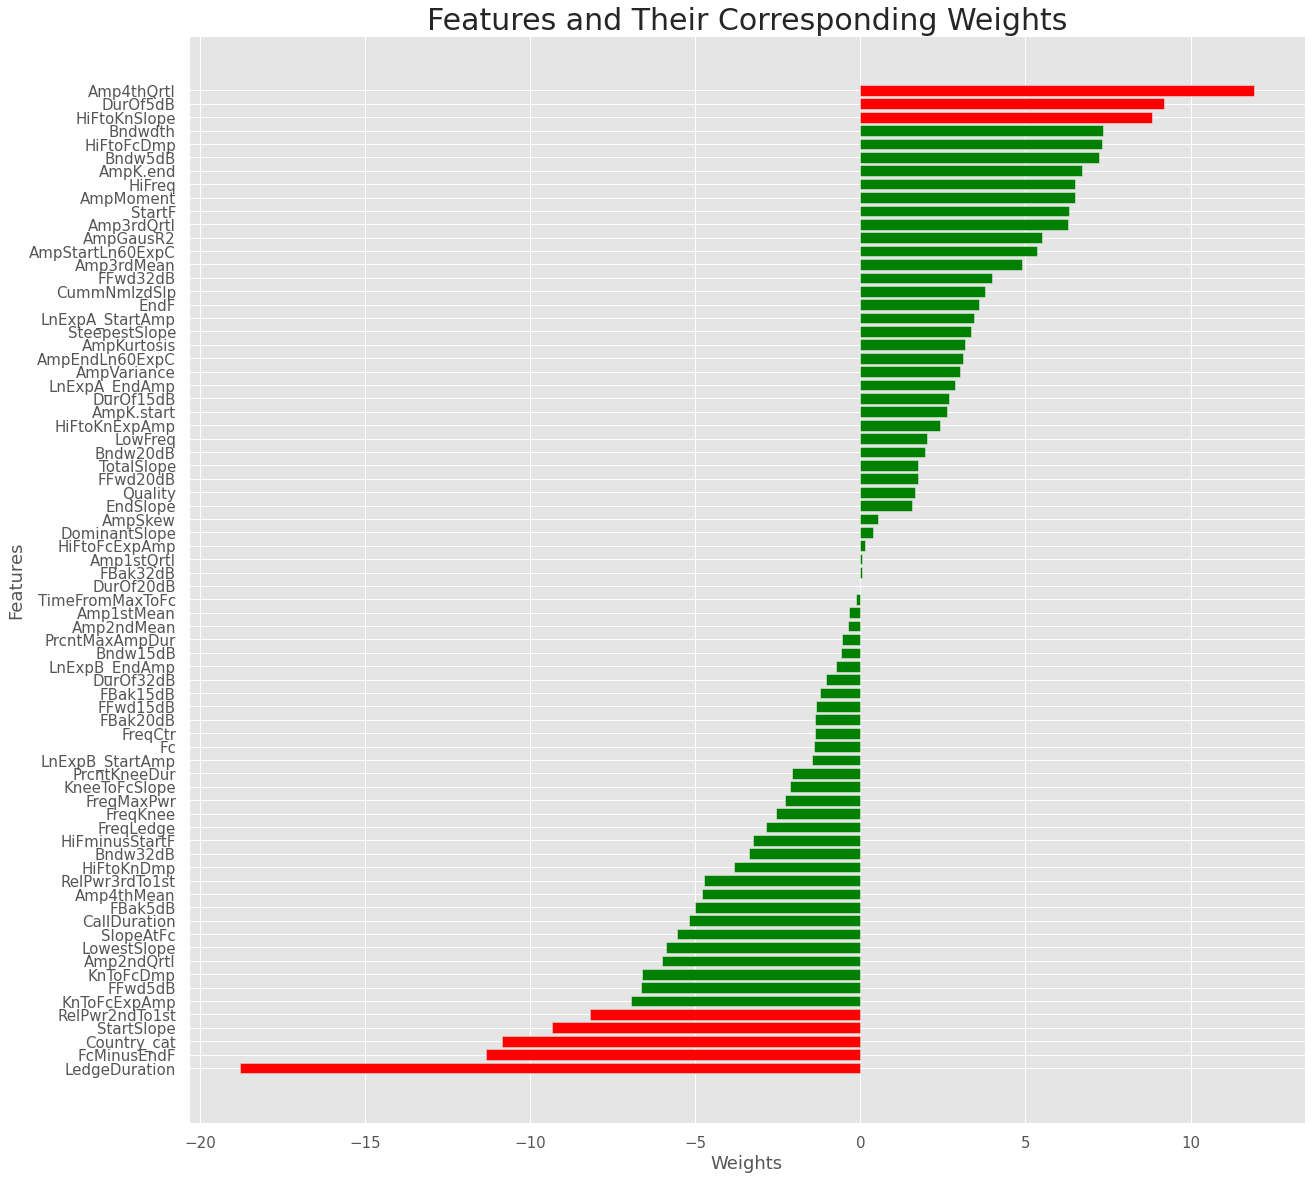

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
#energy = [5, 6, 15, 22, 24, 8]



plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.figure(figsize=(20,20))
plt.barh(d.Feature[d.Weight > 8 ], d.Weight[d.Weight > 8], color='red')
plt.barh(d.Feature[d.Weight <= 8], d.Weight[d.Weight <= 8], color='green')
plt.barh(d.Feature[d.Weight < -8 ], d.Weight[d.Weight < -8 ], color='red')
plt.gca().invert_yaxis()
plt.xlabel("Weights", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Features and Their Corresponding Weights", fontsize=30)

#plt.xticks(x_pos, x)

plt.show()

### **Prediction performance on each family**

In [271]:
model.save("Model_Family.h5")
y_pred = model.predict(x_test)

y_pred1 = [a.tolist() for a in y_pred]
y_pred1 = [a.index(max(a)) for a in y_pred1]


print(type(y_pred1[1]))
print(y_pred[1])
print(y_pred1[1])
print(len(y_test))

<class 'int'>
[1.0031811e-26 3.2401443e-14 3.8502180e-37 1.0495080e-29 3.7341952e-29
 7.6900148e-19 1.4386335e-37 1.0000000e+00]
7
1362


In [272]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred1)
print(matrix)
data.Family.unique()

[[112   2   3   0   0   0   0   1]
 [  5 123   0   0   0   0   0   5]
 [  2   0 129   0   0   0   0   0]
 [  0   0   0  27   0   0   0   0]
 [  0   0   0   0  20   0   0   0]
 [  0   0   1   0   0 217   0   2]
 [  0   0   0   0   0   0  13   0]
 [  0   6   0   0   0  12   0 682]]


[Phyllostomidae, Vespertilionidae, Emballonuridae, Molossidae, Mormoopidae, Natalidae, Noctilionidae, Thyropteridae]
Categories (8, object): [Phyllostomidae, Vespertilionidae, Emballonuridae, Molossidae, Mormoopidae,
                         Natalidae, Noctilionidae, Thyropteridae]

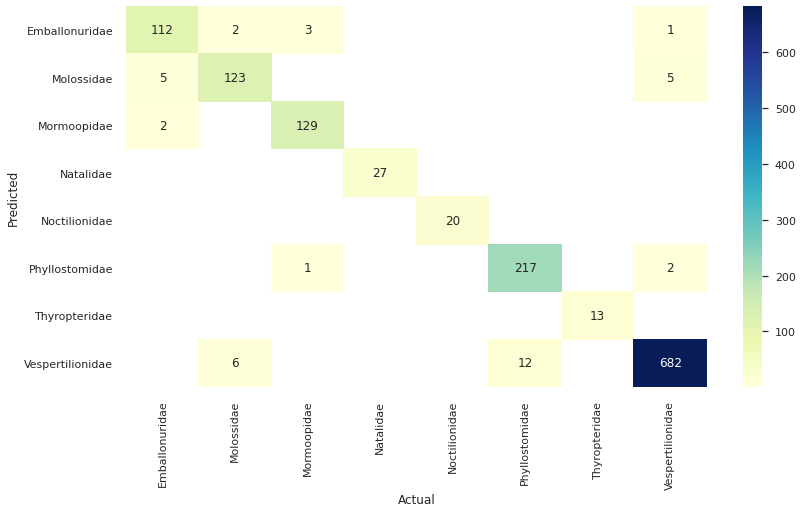

In [274]:
from yellowbrick.classifier import ClassPredictionError

sb.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

matrix = np.ma.masked_where(matrix == 0, matrix)

f = ['Phyllostomidae', 'Vespertilionidae', 'Emballonuridae', 'Molossidae', 'Mormoopidae', 'Natalidae', 'Noctilionidae', 'Thyropteridae']
f.sort()

df_cm = pd.DataFrame(matrix, index = [i for i in f],
                  columns = [i for i in f])
plt.figure(figsize = (13,7))
sb.heatmap(df_cm, annot=True, fmt = 'g', cmap="YlGnBu")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [275]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred1, target_names= f, output_dict = True)
d = pd.DataFrame(report).transpose()


d.to_excel(r'report.xlsx', index = True)
d.head(34)

,precision,recall,f1-score,support
Emballonuridae,0.941176,0.949153,0.945148,118.000000
Molossidae,0.938931,0.924812,0.931818,133.000000
Mormoopidae,0.969925,0.984733,0.977273,131.000000
Natalidae,1.000000,1.000000,1.000000,27.000000
Noctilionidae,1.000000,1.000000,1.000000,20.000000
Phyllostomidae,0.947598,0.986364,0.966592,220.000000
Thyropteridae,1.000000,1.000000,1.000000,13.000000
Vespertilionidae,0.988406,0.974286,0.981295,700.000000
accuracy,0.971366,0.971366,0.971366,0.971366
macro avg,0.973255,0.977418,0.975266,1362.000000


# **Neural Network for Classifying the Genus**

In [102]:
print(data.isnull().sum().sum())
data = data.dropna(how="any")
d = data.reset_index(drop=True)
x = d.select_dtypes(exclude=['object', 'category'])
x = x.drop(['Species_cat', 'Genus_cat', 'Guild_cat', 'Family_cat', 'File_cat'], axis=1)
y = d["Genus_cat"]
print(x.columns)
len(y.value_counts())
#print(y.isnull().any())
print(d.isnull().sum().sum())


# -------------------------------------------------------------------------------------------
# One-hot encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
#y = np_utils.to_categorical(encoded_Y)
#print(len(x.columns))
# -------------------------------------------------------------------------------------------

print(len(x.columns))

## Preprocesing - scaling
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)



x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
#print(len(x_train))

0
Index(['Quality', 'CallDuration', 'Fc', 'HiFreq', 'LowFreq', 'Bndwdth',
       'FreqMaxPwr', 'PrcntMaxAmpDur', 'TimeFromMaxToFc', 'FreqKnee',
       'PrcntKneeDur', 'StartF', 'EndF', 'DominantSlope', 'SlopeAtFc',
       'StartSlope', 'EndSlope', 'SteepestSlope', 'LowestSlope', 'TotalSlope',
       'HiFtoKnSlope', 'KneeToFcSlope', 'CummNmlzdSlp', 'HiFtoFcExpAmp',
       'HiFtoFcDmp', 'KnToFcExpAmp', 'KnToFcDmp', 'HiFtoKnExpAmp',
       'HiFtoKnDmp', 'FreqLedge', 'LedgeDuration', 'FreqCtr', 'FBak32dB',
       'FFwd32dB', 'FBak20dB', 'FFwd20dB', 'FBak15dB', 'FFwd15dB', 'FBak5dB',
       'FFwd5dB', 'Bndw32dB', 'Bndw20dB', 'Bndw15dB', 'Bndw5dB', 'DurOf32dB',
       'DurOf20dB', 'DurOf15dB', 'DurOf5dB', 'Amp1stQrtl', 'Amp2ndQrtl',
       'Amp3rdQrtl', 'Amp4thQrtl', 'Amp1stMean', 'Amp2ndMean', 'Amp3rdMean',
       'Amp4thMean', 'LnExpA_StartAmp', 'LnExpB_StartAmp', 'AmpStartLn60ExpC',
       'LnExpA_EndAmp', 'LnExpB_EndAmp', 'AmpEndLn60ExpC', 'AmpK.start',
       'AmpK.end', 'AmpKurtosis', 

In [103]:
model = Sequential()

## Input layer and Hidden Layer 1
model.add(Dense(100, input_dim = 74, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.30, noise_shape=None, seed= None))

## Hidden Layer 2
model.add(Dense(75, activation="relu"))
model.add(Dropout(0.30, noise_shape=None, seed= None))

## Hidden Layer 3
model.add(Dense(60, activation="relu"))
model.add(Dropout(0.30, noise_shape=None, seed= None))


## Output Layer
model.add(Dense(32, activation="softmax"))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 100)               7500      
_________________________________________________________________
dropout_53 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 75)                7575      
_________________________________________________________________
dropout_54 (Dropout)         (None, 75)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 60)                4560      
_________________________________________________________________
dropout_55 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 32)              

In [104]:
#Compiling the model
ad = Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = ad, metrics = ['accuracy']) 


#Training
fit = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_test, y_test))

print("Training accuracy :", np.mean(fit.history["accuracy"]))
print("Validation accuracy :", np.mean(fit.history["val_accuracy"]))
print("\n\nAccuracy:\n")
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test score(Loss): ", score[0])
print("Test accuracy: ", score[1])

Epoch 1/200
398/398 [==============================] - 1s 2ms/step - loss: 2.7226 - accuracy: 0.2731 - val_loss: 1.7425 - val_accuracy: 0.4802
Epoch 2/200
398/398 [==============================] - 1s 2ms/step - loss: 1.8184 - accuracy: 0.4393 - val_loss: 1.2682 - val_accuracy: 0.5888
Epoch 3/200
398/398 [==============================] - 1s 2ms/step - loss: 1.5290 - accuracy: 0.4965 - val_loss: 1.0682 - val_accuracy: 0.6652
Epoch 4/200
398/398 [==============================] - 1s 2ms/step - loss: 1.3504 - accuracy: 0.5560 - val_loss: 0.9058 - val_accuracy: 0.6982
Epoch 5/200
398/398 [==============================] - 1s 2ms/step - loss: 1.2164 - accuracy: 0.5909 - val_loss: 0.8511 - val_accuracy: 0.7247
Epoch 6/200
398/398 [==============================] - 1s 2ms/step - loss: 1.1250 - accuracy: 0.6218 - val_loss: 0.7755 - val_accuracy: 0.7533
Epoch 7/200
398/398 [==============================] - 1s 2ms/step - loss: 1.0910 - accuracy: 0.6366 - val_loss: 0.7503 - val_accuracy: 0.7570

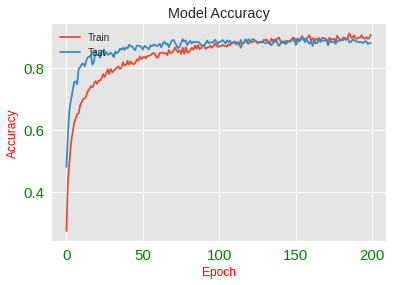

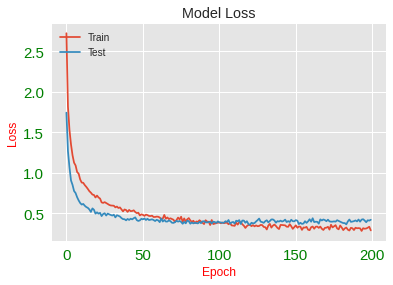

In [105]:
#model.save("Model.h5")

#Plot training & validation accuracy values


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]


plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

print('\n\n')

# Plot training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### **Feature Importance using Weights**

(75, 60)
100
74


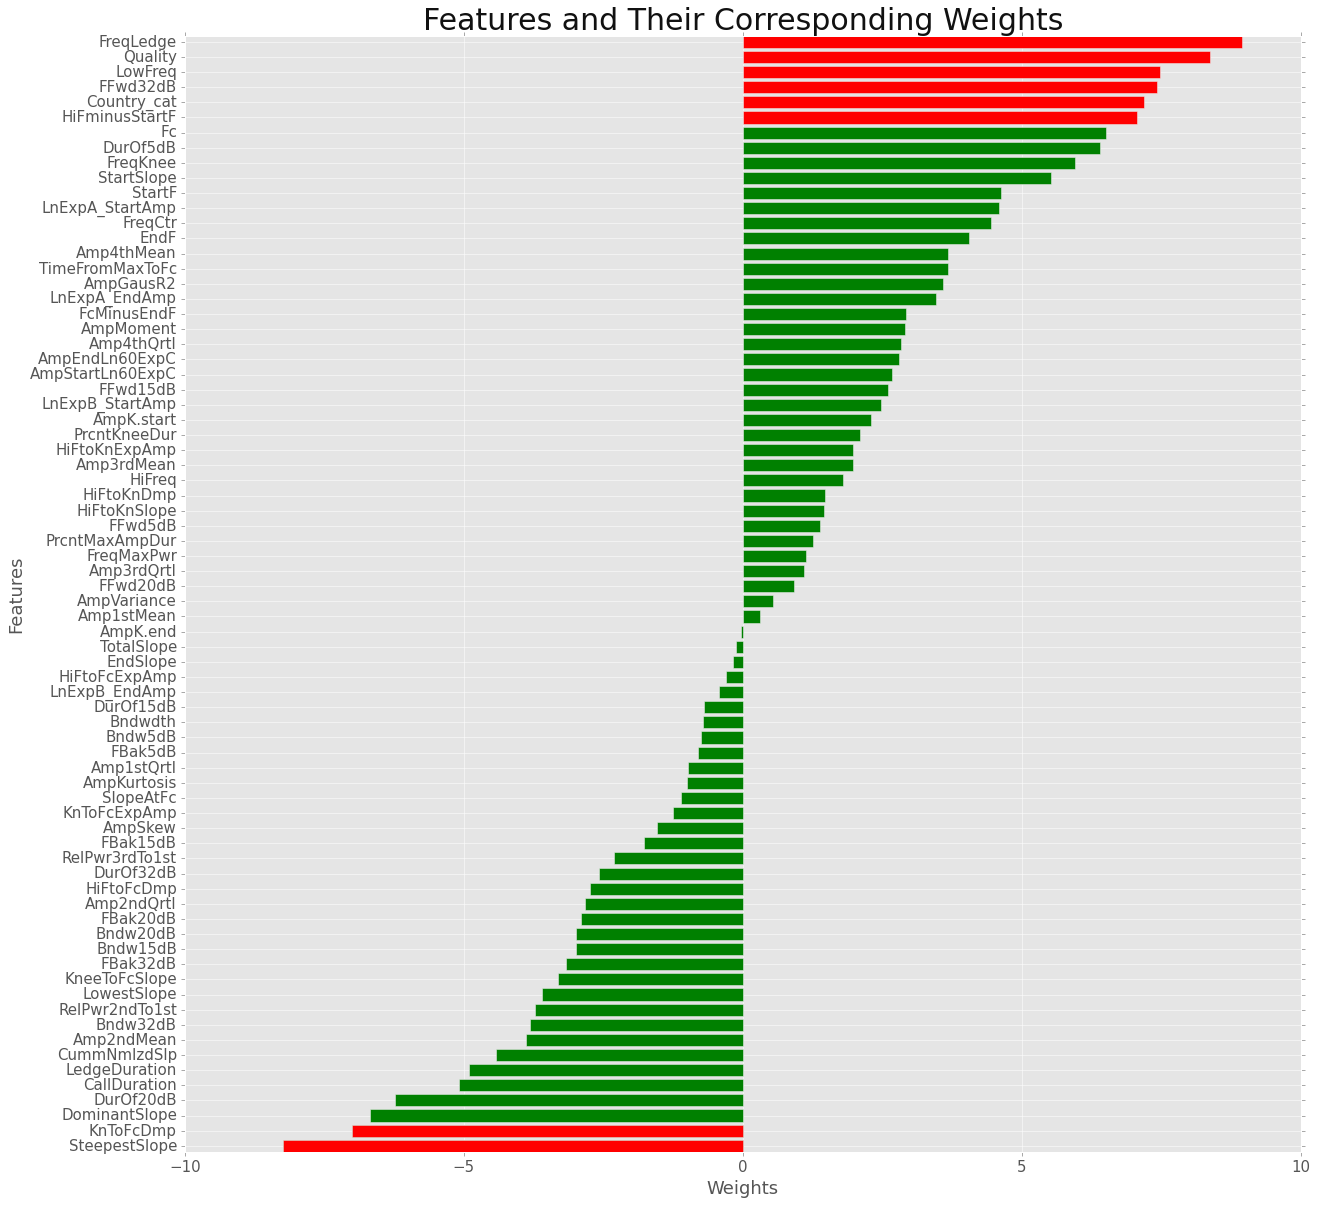

In [233]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


#model = keras.models.load_model('Model.h5')
weights = model.get_weights()
print(weights[4].shape)
weights = model.get_weights()
w = weights[0]
print(len(w[1]))


res = list() 
for i in range(0, len(w)): 
    tmp = 0
    for j in range(0, len(w[i])): 
        tmp = tmp + w[i][j] 
    res.append(tmp) 
print(len(res))

#df_a.reset_index(drop=True)
df = pd.concat([pd.Series(x.columns.tolist()), pd.Series(res)], axis=1)
df.columns = ['Feature','Weight']
df = df.sort_values('Weight', ascending=False)
d = df

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.figure(figsize=(20,20))
plt.barh(d.Feature[d.Weight > 7 ], d.Weight[d.Weight > 7 ], color='red')
plt.barh(d.Feature[d.Weight <= 7], d.Weight[d.Weight <= 7], color='green')
plt.barh(d.Feature[d.Weight < -7 ], d.Weight[d.Weight < -7 ], color='red')
plt.gca().invert_yaxis()
plt.xlabel("Weights", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Features and Their Corresponding Weights", fontsize=30)

#plt.xticks(x_pos, x)

plt.show()

## **Prediction Performance on Each Genus**

In [106]:
model.save("Model_Genus.h5")
y_pred = model.predict(x_test)

y_pred1 = [a.tolist() for a in y_pred]
y_pred1 = [a.index(max(a)) for a in y_pred1]


print(type(y_pred1[1]))
print(y_pred[1])
print(y_pred1[1])
print(len(y_test))

<class 'int'>
[1.64900732e-24 2.88423820e-04 7.63197752e-12 4.95929383e-12
 1.80219031e-16 1.81668656e-11 2.30429061e-11 5.86762698e-03
 3.38136061e-14 1.78432605e-12 1.78005752e-11 9.93712842e-01
 2.75943634e-12 3.68581159e-17 1.70146350e-08 3.99494752e-17
 8.19913112e-06 1.07418256e-20 6.90621671e-10 5.25155119e-05
 5.65598102e-09 1.43653495e-13 6.96038769e-05 2.44403374e-13
 1.39489377e-14 3.14603343e-10 2.10576435e-20 3.75043226e-12
 1.23783068e-19 6.80258040e-07 5.30586798e-17 3.99079123e-16]
11
1362


In [107]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred1)
print(matrix)
g = data.Genus.unique()

[[13  0  0 ...  0  0  1]
 [ 0 14  0 ...  1  0  0]
 [ 0  0 42 ...  0  0  4]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 1  0  0 ...  0  0 23]]


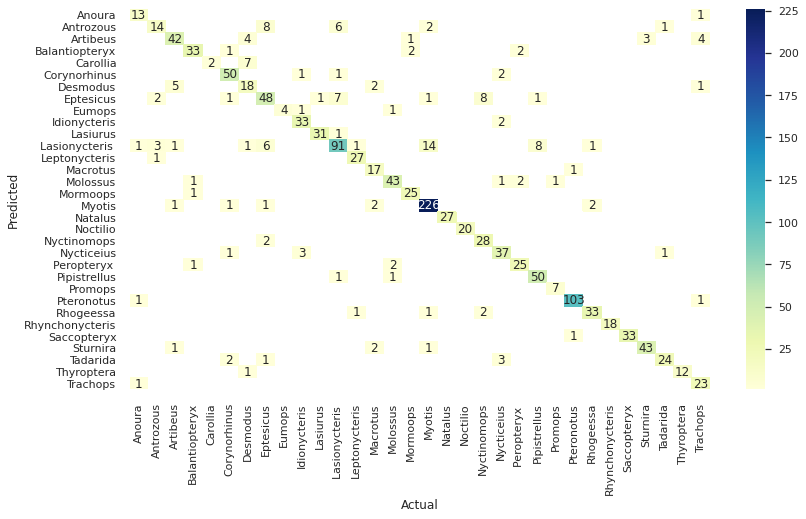

In [116]:
from yellowbrick.classifier import ClassPredictionError

#sb.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')
#make_confusion_matrix(cf_matrix_3x3, figsize=(8,6), cbar=False)

sb.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

matrix = np.ma.masked_where(matrix == 0, matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in g],
                  columns = [i for i in g])
plt.figure(figsize = (13,7))
sb.heatmap(df_cm, annot=True, fmt = 'g', cmap="YlGnBu")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [128]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred1, target_names= g, output_dict = True)
d = pd.DataFrame(report).transpose()


d.to_excel(r'report.xlsx', index = True)
d.head(34)

### **When Family is known**

In [188]:
print(data.isnull().sum().sum())
data = data.dropna(how="any")
d = data.reset_index(drop=True)
x = d.select_dtypes(exclude=['object', 'category'])
x = x.drop(['Species_cat', 'Genus_cat', 'Guild_cat', 'File_cat'], axis=1)
y = d["Genus_cat"]
print(x.columns)
len(y.value_counts())
#print(y.isnull().any())
print(d.isnull().sum().sum())


print(len(x.columns))

## Preprocesing - scaling
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)



x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
#print(len(x_train))

0
Index(['Quality', 'CallDuration', 'Fc', 'HiFreq', 'LowFreq', 'Bndwdth',
       'FreqMaxPwr', 'PrcntMaxAmpDur', 'TimeFromMaxToFc', 'FreqKnee',
       'PrcntKneeDur', 'StartF', 'EndF', 'DominantSlope', 'SlopeAtFc',
       'StartSlope', 'EndSlope', 'SteepestSlope', 'LowestSlope', 'TotalSlope',
       'HiFtoKnSlope', 'KneeToFcSlope', 'CummNmlzdSlp', 'HiFtoFcExpAmp',
       'HiFtoFcDmp', 'KnToFcExpAmp', 'KnToFcDmp', 'HiFtoKnExpAmp',
       'HiFtoKnDmp', 'FreqLedge', 'LedgeDuration', 'FreqCtr', 'FBak32dB',
       'FFwd32dB', 'FBak20dB', 'FFwd20dB', 'FBak15dB', 'FFwd15dB', 'FBak5dB',
       'FFwd5dB', 'Bndw32dB', 'Bndw20dB', 'Bndw15dB', 'Bndw5dB', 'DurOf32dB',
       'DurOf20dB', 'DurOf15dB', 'DurOf5dB', 'Amp1stQrtl', 'Amp2ndQrtl',
       'Amp3rdQrtl', 'Amp4thQrtl', 'Amp1stMean', 'Amp2ndMean', 'Amp3rdMean',
       'Amp4thMean', 'LnExpA_StartAmp', 'LnExpB_StartAmp', 'AmpStartLn60ExpC',
       'LnExpA_EndAmp', 'LnExpB_EndAmp', 'AmpEndLn60ExpC', 'AmpK.start',
       'AmpK.end', 'AmpKurtosis', 

In [189]:
model = Sequential()

## Input layer and Hidden Layer 1
model.add(Dense(120, input_dim = 75, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.30, noise_shape=None, seed= None))


## Hidden Layer 2
model.add(Dense(85, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))


## Hidden Layer 3
model.add(Dense(65, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))


## Output Layer
model.add(Dense(32, activation="softmax"))

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 120)               9120      
_________________________________________________________________
dropout_74 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 85)                10285     
_________________________________________________________________
dropout_75 (Dropout)         (None, 85)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 65)                5590      
_________________________________________________________________
dropout_76 (Dropout)         (None, 65)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 32)              

In [132]:
#Compiling the model
ad = Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = ad, metrics = ['accuracy']) 


#Training
fit = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_test, y_test))

print("Training accuracy :", np.mean(fit.history["accuracy"]))
print("Validation accuracy :", np.mean(fit.history["val_accuracy"]))
print("\n\nAccuracy:\n")
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test score(Loss): ", score[0])
print("Test accuracy: ", score[1])

Epoch 1/200
398/398 [==============================] - 1s 3ms/step - loss: 2.4838 - accuracy: 0.3150 - val_loss: 1.4483 - val_accuracy: 0.5698
Epoch 2/200
398/398 [==============================] - 1s 2ms/step - loss: 1.5369 - accuracy: 0.5186 - val_loss: 0.9760 - val_accuracy: 0.6872
Epoch 3/200
398/398 [==============================] - 1s 2ms/step - loss: 1.2039 - accuracy: 0.6001 - val_loss: 0.7995 - val_accuracy: 0.7445
Epoch 4/200
398/398 [==============================] - 1s 2ms/step - loss: 1.0478 - accuracy: 0.6410 - val_loss: 0.6862 - val_accuracy: 0.7636
Epoch 5/200
398/398 [==============================] - 1s 2ms/step - loss: 0.9139 - accuracy: 0.6797 - val_loss: 0.6074 - val_accuracy: 0.8062
Epoch 6/200
398/398 [==============================] - 1s 2ms/step - loss: 0.8619 - accuracy: 0.7083 - val_loss: 0.5446 - val_accuracy: 0.8216
Epoch 7/200
398/398 [==============================] - 1s 2ms/step - loss: 0.8023 - accuracy: 0.7127 - val_loss: 0.5276 - val_accuracy: 0.8164

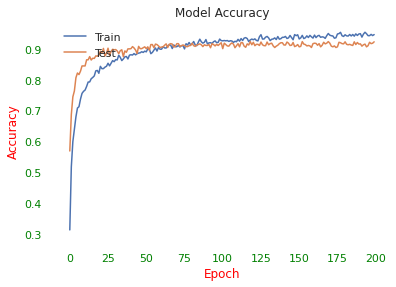

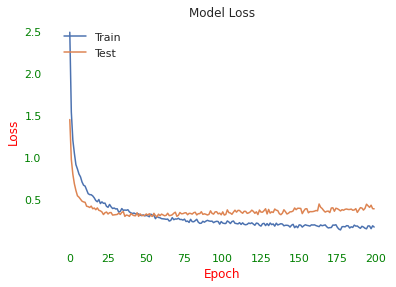

In [133]:
#model.save("Model.h5")

#Plot training & validation accuracy values


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]


plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

print('\n\n')

# Plot training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Association of Call Acoustics With Geographical Location**

In [244]:
## Preparing the data

data = data.dropna(how="any")
data = data.reset_index(drop=True)
x = data.select_dtypes(exclude=['object', 'category'])
x = x.drop(['Species_cat', 'Country_cat', 'Genus_cat', 'Guild_cat', 'Family_cat', 'File_cat'], axis=1)
y = data["Country_cat"]


print(len(x.columns))
print(x.columns)

## Preprocesing - scaling
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)



x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=42)
#print(len(y_train))
#print(len(y_test))
print(pd.unique(y_train))
print(pd.unique(y_test))
print(pd.unique(data['Country']))
print(len([x for x in data["Country"] if x == 'Unknown']))

#data[data['Country_cat'] == 9]

73
Index(['Quality', 'CallDuration', 'Fc', 'HiFreq', 'LowFreq', 'Bndwdth',
       'FreqMaxPwr', 'PrcntMaxAmpDur', 'TimeFromMaxToFc', 'FreqKnee',
       'PrcntKneeDur', 'StartF', 'EndF', 'DominantSlope', 'SlopeAtFc',
       'StartSlope', 'EndSlope', 'SteepestSlope', 'LowestSlope', 'TotalSlope',
       'HiFtoKnSlope', 'KneeToFcSlope', 'CummNmlzdSlp', 'HiFtoFcExpAmp',
       'HiFtoFcDmp', 'KnToFcExpAmp', 'KnToFcDmp', 'HiFtoKnExpAmp',
       'HiFtoKnDmp', 'FreqLedge', 'LedgeDuration', 'FreqCtr', 'FBak32dB',
       'FFwd32dB', 'FBak20dB', 'FFwd20dB', 'FBak15dB', 'FFwd15dB', 'FBak5dB',
       'FFwd5dB', 'Bndw32dB', 'Bndw20dB', 'Bndw15dB', 'Bndw5dB', 'DurOf32dB',
       'DurOf20dB', 'DurOf15dB', 'DurOf5dB', 'Amp1stQrtl', 'Amp2ndQrtl',
       'Amp3rdQrtl', 'Amp4thQrtl', 'Amp1stMean', 'Amp2ndMean', 'Amp3rdMean',
       'Amp4thMean', 'LnExpA_StartAmp', 'LnExpB_StartAmp', 'AmpStartLn60ExpC',
       'LnExpA_EndAmp', 'LnExpB_EndAmp', 'AmpEndLn60ExpC', 'AmpK.start',
       'AmpK.end', 'AmpKurtosis',

In [200]:
## Structure of NN

model = Sequential()

## Input layer and Hidden Layer 1
model.add(Dense(65, input_dim = 73, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.40, noise_shape=None, seed= None))


## Hidden Layer 2
model.add(Dense(55, activation="relu"))
model.add(Dropout(0.35, noise_shape=None, seed= None))


## Hidden Layer 3
model.add(Dense(25, activation="relu"))
model.add(Dropout(0.35, noise_shape=None, seed= None))



## Output Layer
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 65)                4810      
_________________________________________________________________
dropout_83 (Dropout)         (None, 65)                0         
_________________________________________________________________
dense_121 (Dense)            (None, 55)                3630      
_________________________________________________________________
dropout_84 (Dropout)         (None, 55)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 25)                1400      
_________________________________________________________________
dropout_85 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 10)              

In [185]:
!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;
ann_viz(model, title="Neural Network Architecture", view = True, filename="nw.gv")

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4169 sha256=bca1766869fa02a747777e88735f2247fcf4d5e39c8b7811d0c5faab7661c526
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [201]:
#Compiling the model
ad = Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = ad, metrics = ['accuracy']) 


#Training
fit = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_test, y_test))

print("Training accuracy :", np.mean(fit.history["accuracy"]))
print("Validation accuracy :", np.mean(fit.history["val_accuracy"]))
print("\n\nAccuracy:\n")
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test score(Loss): ", score[0])
print("Test accuracy (Final Epoch): ", score[1])

Epoch 1/200
369/369 [==============================] - 1s 2ms/step - loss: 1.2099 - accuracy: 0.7198 - val_loss: 0.6834 - val_accuracy: 0.8194
Epoch 2/200
369/369 [==============================] - 1s 2ms/step - loss: 0.8187 - accuracy: 0.8133 - val_loss: 0.5741 - val_accuracy: 0.8332
Epoch 3/200
369/369 [==============================] - 1s 2ms/step - loss: 0.7284 - accuracy: 0.8218 - val_loss: 0.5293 - val_accuracy: 0.8389
Epoch 4/200
369/369 [==============================] - 1s 2ms/step - loss: 0.6673 - accuracy: 0.8248 - val_loss: 0.4848 - val_accuracy: 0.8477
Epoch 5/200
369/369 [==============================] - 1s 2ms/step - loss: 0.6099 - accuracy: 0.8302 - val_loss: 0.4628 - val_accuracy: 0.8578
Epoch 6/200
369/369 [==============================] - 1s 2ms/step - loss: 0.5859 - accuracy: 0.8323 - val_loss: 0.4467 - val_accuracy: 0.8628
Epoch 7/200
369/369 [==============================] - 1s 2ms/step - loss: 0.5742 - accuracy: 0.8268 - val_loss: 0.4346 - val_accuracy: 0.8439

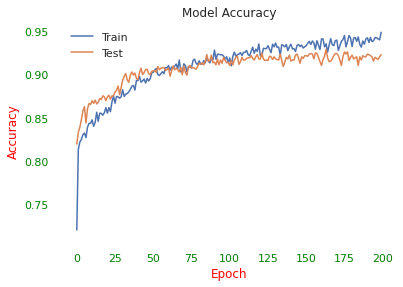

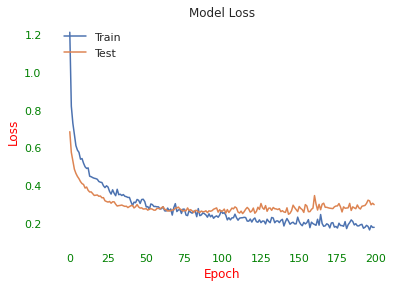

In [202]:
#model.save("Model.h5")

#Plot training & validation accuracy values


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]


plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

print('\n\n')

# Plot training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### **Prediction performance on each Country**

In [237]:
model.save("Model_Country.h5")
y_pred = model.predict(x_test)

y_pred1 = [a.tolist() for a in y_pred]
y_pred1 = [a.index(max(a)) for a in y_pred1]


print(type(y_pred1[1]))
print(y_pred[1])
print(y_pred1[1])
print(y_train[0:5])


from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred1)
print(matrix)
data.Country.unique()

<class 'int'>
[6.14255727e-26 7.18871837e-12 1.70451736e-10 2.81365607e-23
 1.19326636e-20 5.16979624e-16 1.00000000e+00 4.42683349e-26
 2.03200527e-14 0.00000000e+00]
6
2903    6
3475    1
3245    6
1457    1
1509    6
Name: Country_cat, dtype: int8
[[   4    0    0    0    0    0    2    0    0    0]
 [   0   67    0    0    0    0   17    0    0    0]
 [   0    1   31    2    0    0    9    0    0    0]
 [   0    0    0   46    0    0   14    1    0    0]
 [   0    0    0    0    9    0    5    0    0    0]
 [   0    0    0    1    6   16    9    0    0    0]
 [   2   17    1   11    1    8 1254    4    0    0]
 [   0    0    0    1    0    0    8   36    0    0]
 [   0    0    0    0    0    0    1    0    3    0]
 [   0    0    0    0    0    0    1    0    0    1]]


[Mexico, FrenchGuiana, Panama, CostaRica, Canada, Unknown, Martinique, Guadeloupe, USA, Brazil]
Categories (10, object): [Mexico, FrenchGuiana, Panama, CostaRica, ..., Martinique, Guadeloupe, USA,
                          Brazil]

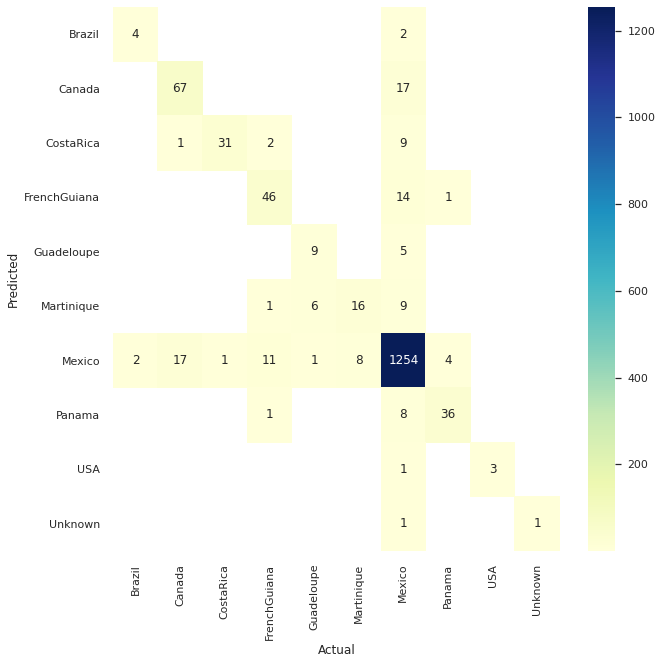

In [240]:
from yellowbrick.classifier import ClassPredictionError

#sb.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')
#make_confusion_matrix(cf_matrix_3x3, figsize=(8,6), cbar=False)
labels = ['Mexico', 'FrenchGuiana', 'Panama', 'CostaRica', 'Canada', 'Unknown', 'Martinique', 'Guadeloupe', 'USA', 'Brazil']
labels.sort()
sb.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

matrix = np.ma.masked_where(matrix == 0, matrix)


df_cm = pd.DataFrame(matrix, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,10))
sb.heatmap(df_cm, annot=True, fmt = 'g', cmap="YlGnBu")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [242]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred1, target_names= labels, output_dict = True)
d = pd.DataFrame(report).transpose()


d.to_excel(r'report.xlsx', index = True)
d.head(34)

,precision,recall,f1-score,support
Brazil,0.666667,0.666667,0.666667,6.000000
Canada,0.788235,0.797619,0.792899,84.000000
CostaRica,0.968750,0.720930,0.826667,43.000000
FrenchGuiana,0.754098,0.754098,0.754098,61.000000
Guadeloupe,0.562500,0.642857,0.600000,14.000000
Martinique,0.666667,0.500000,0.571429,32.000000
Mexico,0.950000,0.966102,0.957983,1298.000000
Panama,0.878049,0.800000,0.837209,45.000000
USA,1.000000,0.750000,0.857143,4.000000
Unknown,1.000000,0.500000,0.666667,2.000000


### **Feature Importance using Weights**

(55, 25)
65
73


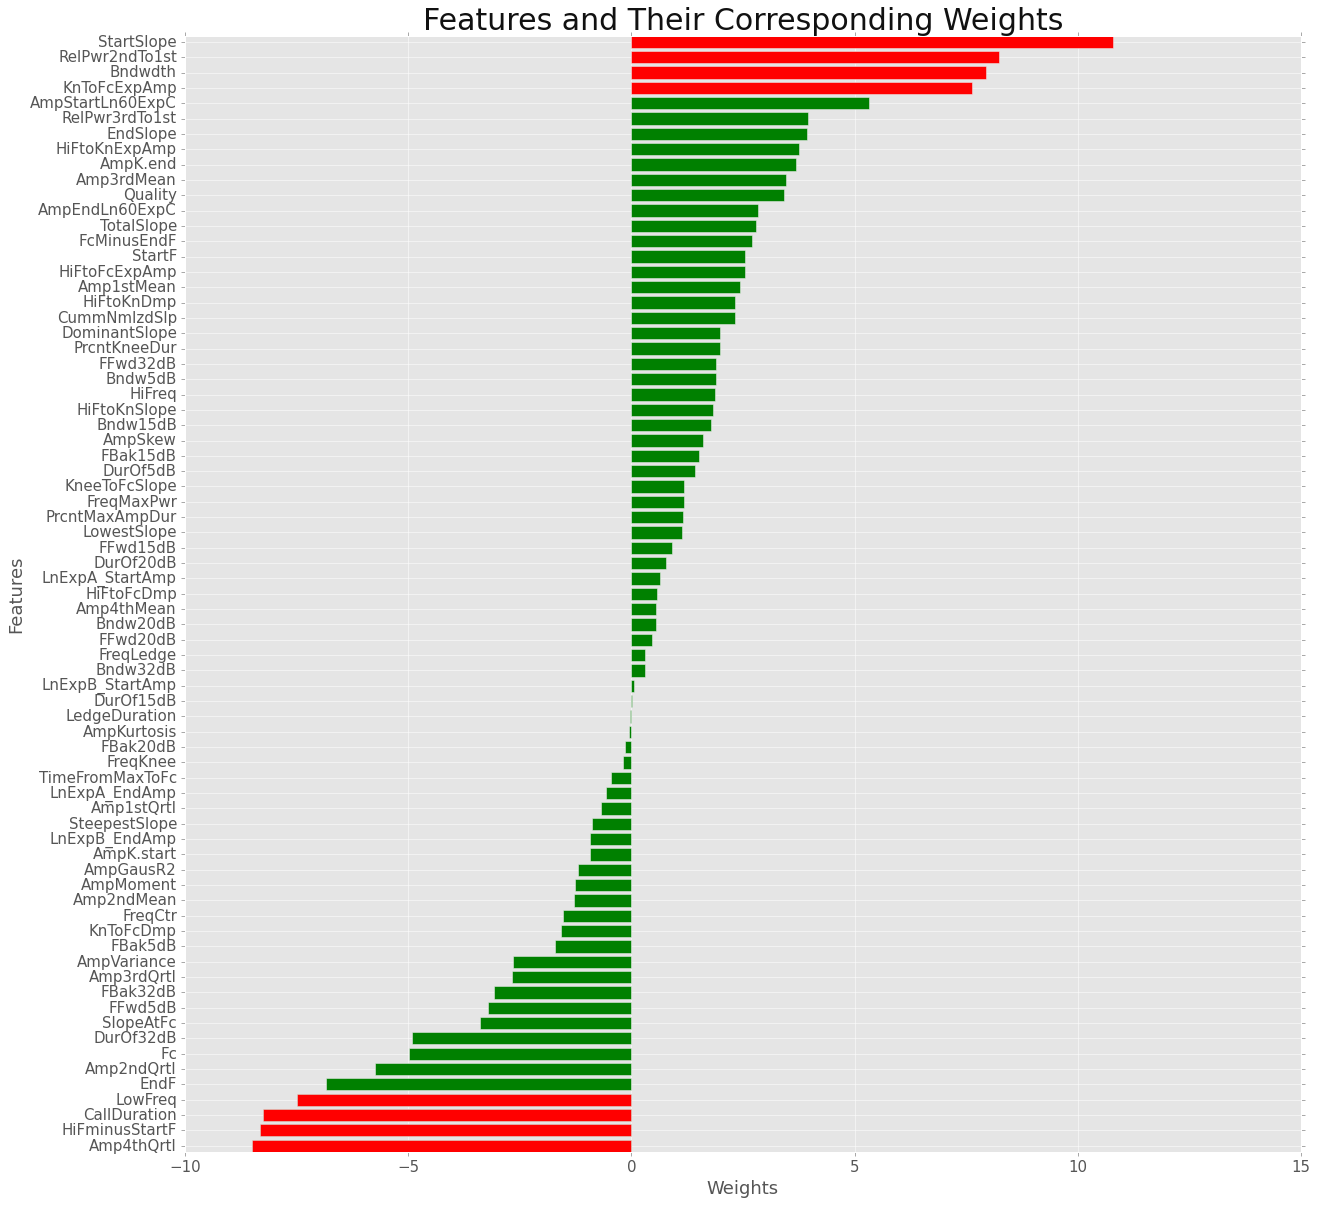

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


#model = keras.models.load_model('Model.h5')
weights = model.get_weights()
print(weights[4].shape)
weights = model.get_weights()
w = weights[0]
print(len(w[1]))


res = list() 
for i in range(0, len(w)): 
    tmp = 0
    for j in range(0, len(w[i])): 
        tmp = tmp + w[i][j] 
    res.append(tmp) 
print(len(res))

#df_a.reset_index(drop=True)
df = pd.concat([pd.Series(x.columns.tolist()), pd.Series(res)], axis=1)
df.columns = ['Feature','Weight']
df = df.sort_values('Weight', ascending=False)
d = df

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.figure(figsize=(20,20))
plt.barh(d.Feature[d.Weight > 7.5 ], d.Weight[d.Weight > 7.5 ], color='red')
plt.barh(d.Feature[d.Weight <= 6], d.Weight[d.Weight <= 6], color='green')
plt.barh(d.Feature[d.Weight < -7 ], d.Weight[d.Weight < -7], color='red')
plt.gca().invert_yaxis()
plt.xlabel("Weights", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Features and Their Corresponding Weights", fontsize=30)

#plt.xticks(x_pos, x)

plt.show()

# **Neural Network for Classifying the Guild (**Extra**)**

In [8]:
## Preparing the data

data = data.dropna(how="any")
data = data.reset_index(drop=True)
x = data.select_dtypes(exclude=['object', 'category'])
x = x.drop(['Species_cat', 'Genus_cat', 'Guild_cat', 'Family_cat', 'File_cat'], axis=1)
y = data["Guild_cat"]


print(len(x.columns))
print(x.columns)

## Preprocesing - scaling
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)



x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
print(len(y_train))
print(len(y_test))
print(pd.unique(y_test))
print(pd.unique(data['Country']))
print(len([x for x in data["Country"] if x == 'Unknown']))

74
Index(['Quality', 'CallDuration', 'Fc', 'HiFreq', 'LowFreq', 'Bndwdth',
       'FreqMaxPwr', 'PrcntMaxAmpDur', 'TimeFromMaxToFc', 'FreqKnee',
       'PrcntKneeDur', 'StartF', 'EndF', 'DominantSlope', 'SlopeAtFc',
       'StartSlope', 'EndSlope', 'SteepestSlope', 'LowestSlope', 'TotalSlope',
       'HiFtoKnSlope', 'KneeToFcSlope', 'CummNmlzdSlp', 'HiFtoFcExpAmp',
       'HiFtoFcDmp', 'KnToFcExpAmp', 'KnToFcDmp', 'HiFtoKnExpAmp',
       'HiFtoKnDmp', 'FreqLedge', 'LedgeDuration', 'FreqCtr', 'FBak32dB',
       'FFwd32dB', 'FBak20dB', 'FFwd20dB', 'FBak15dB', 'FFwd15dB', 'FBak5dB',
       'FFwd5dB', 'Bndw32dB', 'Bndw20dB', 'Bndw15dB', 'Bndw5dB', 'DurOf32dB',
       'DurOf20dB', 'DurOf15dB', 'DurOf5dB', 'Amp1stQrtl', 'Amp2ndQrtl',
       'Amp3rdQrtl', 'Amp4thQrtl', 'Amp1stMean', 'Amp2ndMean', 'Amp3rdMean',
       'Amp4thMean', 'LnExpA_StartAmp', 'LnExpB_StartAmp', 'AmpStartLn60ExpC',
       'LnExpA_EndAmp', 'LnExpB_EndAmp', 'AmpEndLn60ExpC', 'AmpK.start',
       'AmpK.end', 'AmpKurtosis',

In [9]:
## Structure of NN

model = Sequential()

## Input layer and Hidden Layer 1
model.add(Dense(100, input_dim = 74, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.30, noise_shape=None, seed= None))


## Hidden Layer 2
model.add(Dense(75, activation="relu"))
model.add(Dropout(0.30, noise_shape=None, seed= None))


## Hidden Layer 3
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.25, noise_shape=None, seed= None))


## Output Layer
model.add(Dense(6, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               7500      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 75)                7575      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1520      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 1

In [10]:
#Compiling the model
ad = Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = ad, metrics = ['accuracy']) 


#Training
fit = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_test, y_test))

print("Training accuracy :", np.mean(fit.history["accuracy"]))
print("Validation accuracy :", np.mean(fit.history["val_accuracy"]))
print("\n\nAccuracy:\n")
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test score(Loss): ", score[0])
print("Test accuracy (Final Epoch): ", score[1])

Epoch 1/200
454/454 [==============================] - 1s 2ms/step - loss: 1.3717 - accuracy: 0.4436 - val_loss: 0.9001 - val_accuracy: 0.6729
Epoch 2/200
454/454 [==============================] - 1s 2ms/step - loss: 0.9646 - accuracy: 0.6236 - val_loss: 0.7300 - val_accuracy: 0.7192
Epoch 3/200
454/454 [==============================] - 1s 2ms/step - loss: 0.8605 - accuracy: 0.6732 - val_loss: 0.6502 - val_accuracy: 0.7390
Epoch 4/200
454/454 [==============================] - 1s 1ms/step - loss: 0.7777 - accuracy: 0.6982 - val_loss: 0.5918 - val_accuracy: 0.7588
Epoch 5/200
454/454 [==============================] - 1s 2ms/step - loss: 0.7352 - accuracy: 0.7216 - val_loss: 0.5581 - val_accuracy: 0.7753
Epoch 6/200
454/454 [==============================] - 1s 2ms/step - loss: 0.7034 - accuracy: 0.7329 - val_loss: 0.5378 - val_accuracy: 0.7731
Epoch 7/200
454/454 [==============================] - 1s 1ms/step - loss: 0.6592 - accuracy: 0.7459 - val_loss: 0.4995 - val_accuracy: 0.7963

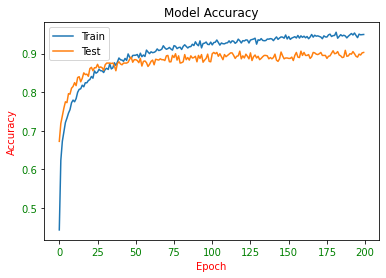

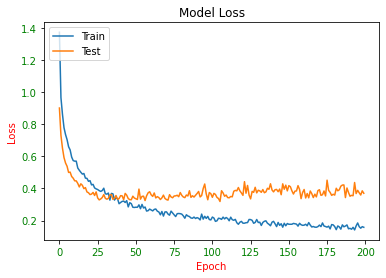

In [11]:
#model.save("Model.h5")

#Plot training & validation accuracy values


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]


plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


label = plt.ylabel("Accuracy")
label.set_color("red")
label = plt.xlabel("Epoch")
label.set_color("red")


[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

print('\n\n')

# Plot training & validation loss values
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Feature Importance**

In [16]:
#!pip install eli5
from eli5.sklearn import PermutationImportance


perm = PermutationImportance(model, random_state=42).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

#eli5.explain_prediction_keras(model, doc = x)


TypeError: ignored

In [ ]:
## Perturbation

### Plot of Weights versus Predictors

In [17]:
weights = model.get_weights()
print(weights[4].shape)

(75, 20)


In [18]:
#model = keras.models.load_model('Model.h5')
weights = model.get_weights()
w = weights[0]
print(len(w[1]))


res = list() 
for i in range(0, len(w)): 
    tmp = 0
    for j in range(0, len(w[i])): 
        tmp = tmp + w[i][j] 
    res.append(tmp) 
print(len(res))

#df_a.reset_index(drop=True)
df = pd.concat([pd.Series(x.columns.tolist()), pd.Series(res)], axis=1)
df.columns = ['Feature','Weight']
df = df.sort_values('Weight', ascending=False)
d = df

100
74


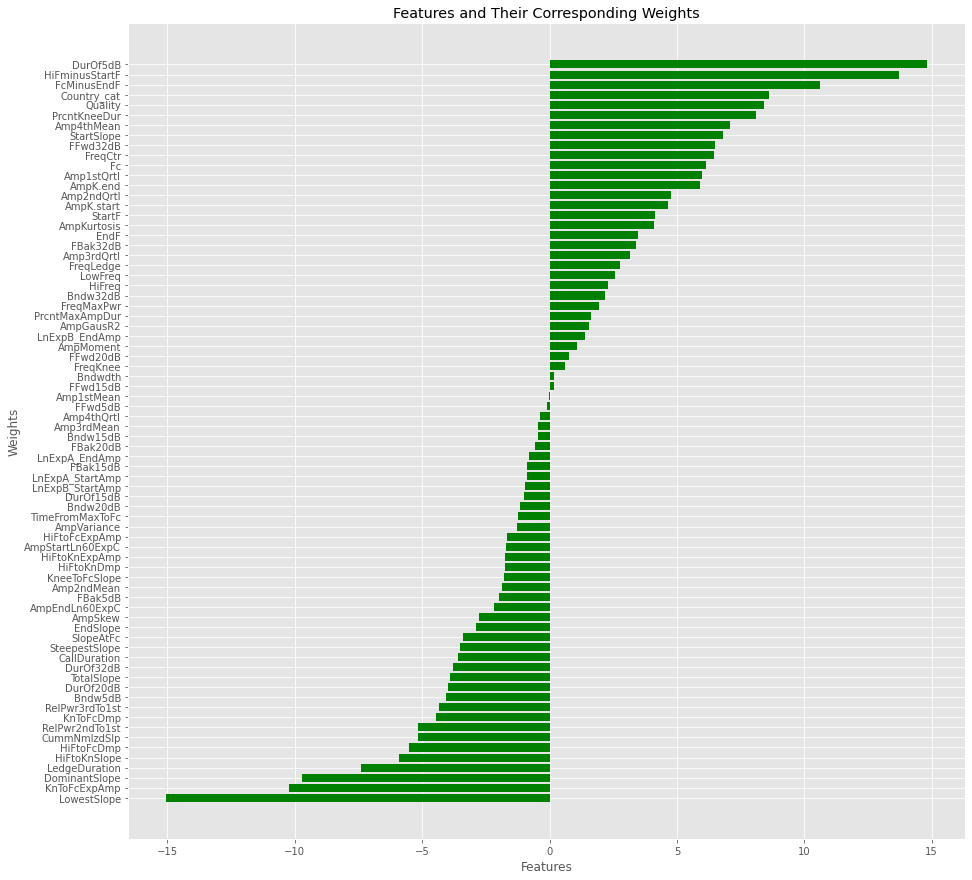

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
#energy = [5, 6, 15, 22, 24, 8]

plt.figure(figsize=(15,15))
plt.barh(d['Feature'], d['Weight'], color='green')
plt.gca().invert_yaxis()
plt.xlabel("Features")
plt.ylabel("Weights")
plt.title("Features and Their Corresponding Weights")

#plt.xticks(x_pos, x)

plt.show()

# **Decryting the Neural Network Using LIME (**Future Work**)**

In [ ]:
!pip install lime
import lime
import lime.lime_tabular

# training the lightgbm model
model = keras.models.load_model('Model.h5')



# this is required as LIME requires class probabilities in case of classification example
# LightGBM directly returns probability for class 1 by default 

def prob(data):
    return np.array(list(zip(1-model.predict(data),model.predict(data))))
    


explainer = lime.lime_tabular.LimeTabularExplainer(data[model.feature_name()].astype(int).values,  
mode='classification',training_labels=y,feature_names=model.feature_name())


# asking for explanation for LIME model
i = 1
exp = explainer.explain_instance(df_titanic.loc[i,feat].astype(int).values, prob, num_features=5)



#### Will try to use DeepLift also for decoding the feature selection.